In [1]:
import numpy as np
from pypdf import PdfMerger
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.stats import linregress
from matplotlib.ticker import AutoMinorLocator
# import statsmodels.api as sm
from scipy.optimize import curve_fit
# import subprocess
# import os
from matplotlib.backends.backend_pdf import PdfPages
import scienceplots
plt.style.use('science')
# to upgrade pandas:
# /opt/homebrew/bin/python3.10 -m pip install --upgrade SciencePlots   
# pip install SciencePlots


In [2]:
# March 1 new presets

mass_nucleon = 0.938273
mass_C12=11.178
alpha_fine = 1/137
initial_correction = 1.0

def round_sig_3(x):
    return '%s' % float('%.3g' % x)


# Q2centers = [0.01 , 0.02 , 0.026, 0.04 , 0.056, 0.093, 0.12 , 0.16 , 0.265, 0.38 , 0.5  , 0.65 , 0.8  , 1.05 , 1.25 , 1.75 , 2.25 , 2.75 , 3.25 , 3.75 ]
# Q2bins = [0.004, 0.015, 0.025, 0.035, 0.045, 0.070, 0.100, 0.145, 0.209, 0.322, 0.438, 0.562, 0.738, 0.962, 1.150, 1.500, 2.000, 2.500, 
#           3.000, 3.500, 4.000]
# Q2bin_names = ['0.004~0.015', '0.015~0.025', '0.025~0.035', '0.035~0.045', '0.045~0.070', '0.070~0.100', '0.100~0.145', '0.145~0.209','0.209~0.322', 
#         '0.322~0.438', '0.438~0.562', '0.562~0.738','0.738~0.962', '0.962~1.150', '1.150~1.500', '1.500~2.000','2.000~2.500', '2.500~3.000', '3.000~3.500', '3.500~4.000'],

# qvcenters = [0.100, 0.148, 0.167, 0.205, 0.240, 0.300, 0.380, 0.475, 0.570, 0.649, 0.756, 0.991, 1.302, 1.619, 1.921, 2.213, 2.500, 2.783]
# qvbins = [0.063, 0.124, 0.158, 0.186, 0.223, 0.270, 0.340, 0.428, 0.523, 0.609, 0.702, 0.878, 1.168, 1.460, 1.770, 2.067, 2.357, 2.642, 2.923]
# qvbin_names = ['0.063~0.124','0.124~0.158','0.158~0.186','0.186~0.223','0.223~0.270','0.270~0.340','0.340~0.428','0.428~0.523','0.523~0.609',
#                '0.609~0.702','0.702~0.878','0.878~1.168','1.168~1.460','1.460~1.770','1.770~2.067','2.067~2.357','2.357~2.642','2.642~2.923']

qvcenters = [0.100, 0.148, 0.167, 0.205, 0.240, 0.300, 0.380, 0.475, 0.570, 0.649, 0.756, 0.991, 1.619, 1.921, 2.213, 2.500, 2.783, 3.500]
qvbins = [0.063, 0.124, 0.158, 0.186, 0.223, 0.270, 0.340, 0.428, 0.523, 0.609, 0.702, 0.878, 1.302, 1.770, 2.067, 2.357, 2.642, 2.923, 4.500]
qvbin_names = ['0.063~0.124','0.124~0.158','0.158~0.186','0.186~0.223','0.223~0.270','0.270~0.340','0.340~0.428','0.428~0.523','0.523~0.609',
                '0.609~0.702','0.702~0.878','0.878~1.302','1.302~1.770','1.770~2.067','2.067~2.357','2.357~2.642','2.642~2.923','2.923~4.500']

Q2centers = [0.010, 0.020, 0.026, 0.040, 0.056, 0.093, 0.120, 0.160, 0.265, 0.380, 0.500, 0.800, 1.250, 1.750, 2.250, 2.750, 3.250, 3.750]
Q2bins = [0.004, 0.015, 0.025, 0.035, 0.045, 0.070, 0.100, 0.145, 0.206, 0.322, 0.438, 0.650, 1.050, 1.500, 2.000, 2.500, 3.000, 3.500, 4.000]
Q2bin_names = ['0.004~0.015', '0.015~0.025', '0.025~0.035', '0.035~0.045', '0.045~0.070', '0.070~0.100', '0.100~0.145', '0.145~0.206', '0.206~0.322', 
               '0.322~0.438', '0.438~0.650', '0.650~1.050', '1.050~1.500', '1.500~2.000', '2.000~2.500', '2.500~3.000', '3.000~3.500', '3.500~4.000']


# nuwidths = [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.01, 0.01, 0.01, 0.01, 0.01,0.01, 0.01, 0.01, 0.01, 0.01]
nuwidths = [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.005, 0.005, 0.005, 
            0.01,     0.01,   0.01,   0.01,   0.01,  0.01,  0.01, 0.01, 
            0.04, 0.04, 0.04, 0.04]

W2widths = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04]

dataSet_to_name = {1:"Barreau:1983ht", 2:"O'Connell:198", 3:"Sealock:1989nx", 4:"Baran:1988tw", 5:"Bagdasaryan:1988hp", 6:"Dai - HallA:2019da", 
    7:"Arrington:1995hs", 8:"Day:1993md", 9:"Arrington:1998psnoCC", 10:"Gaskell:2008", 11:"Whitney:1974hr", 12:"AlsamiJan05", 13:"VaheJun07", 
    14:"Gomez74", 15:"Fomin", 16:"Yamaguchi73", 17:"Ryan84", 18:"Cyzyk:1963zz", 19:"Bounin63", 20:"Photo-Daphne", 21:"Spamer70", 22:"Goldemberg64", 
    23:"DeForrest65", 24:"Donnelly68"}

dataSet_to_normError = {1:0.24320E-02, 2:0.86008E-02, 3:0.48305E-02, 4:0.45501E-02, 5:0.82797E-02, 6:0.52969E-02, 7:0.13229E-01, 8:0.33307E-02, 
        9:0.34432E-02, 10:0.50742E-02, 11:0.15258E-01, 12:0.67079E-03, 13:0.69905E-03, 14:0.14875E-01, 15:0.30856E-02, 16:0.29024E-02, 
        17:0.13049E-01, 18:0.1, 19:0.23, 20:0.10513, 21:0.4, 22:0.1, 23:0.1}

dataSet_to_normalization = {1:0.99185, 2:0.97869, 3:1.0315, 4:0.99241, 5:0.98777, 6:1.0108, 7:0.97427, 8:1.0071, 9:0.98884, 10:0.99340, 11:1.0149, 
                12:0.99812, 13:1.0029, 14:1.0125, 15:1.0046, 16:1.0019, 17:1.0517, 18:1.0, 19:1.1500, 20:0.99754, 21:1.2, 22:1.1, 23:0.85}

def append_row(df, row):
    return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
def linear_model(x, a, b):
    return a * x + b


In [3]:
# March 1 load from circ pre-computed data set
# df = pd.read_csv("df_fortran_Feb19.csv")
# df = pd.read_csv("df_fortran_Feb20.csv")
# df = pd.read_csv("df_fortran_Feb23.csv")
df = pd.read_csv("df_fortran_March1.csv")

df = df.loc[df['dataSet']!=13]
df = df.loc[df['dataSet']!=21]
df = df.loc[df['dataSet']!=18]
# df['Hbc_Sig(GeV)']=0.0
# df['Hbc_error(GeV)']=0.0
# df = pd.read_csv("df_fortran_Feb15.csv")

In [4]:
# for plotting purpose only, read Fortran fit for Q2 and qv centers
Qvcenter_datas = []
for qvcenter in qvcenters:
    Qvcenter_data = pd.read_csv('Qvedges/'+f'Qvedge_{qvcenter}.csv',index_col = False)
    Qvcenter_data.columns = ['qv','q2','ex','nu','RT','RL','RTQE','RLQE','RTIE','RLIE','RTE','RLE','RTNS','RLNS']
    Qvcenter_data['W2']= mass_nucleon**2+2*mass_nucleon*Qvcenter_data['nu']-Qvcenter_data['q2']
    Qvcenter_datas.append(Qvcenter_data)


Q2center_datas = []
for Q2center in Q2centers:
    Q2center_data = pd.read_csv('Q2edges/'+f'Q2edge_{Q2center}.csv',index_col = False)
    Q2center_data.columns = ['qv','q2','ex','nu','RT','RL','RTQE','RLQE','RTIE','RLIE','RTE','RLE','RTNS','RLNS']
    Q2center_data['W2']= mass_nucleon**2+2*mass_nucleon*Q2center_data['nu']-Q2center_data['q2']
    Q2center_datas.append(Q2center_data)


In [6]:
# Feb 25: plots settings
# figsize = ((4*1.25), (3*1.25)*3)
# inspect_columns = [0]
errorbar_setting = {'markersize':'0','capsize':0,'lw':0.5,'fmt':'D','ecolor':'black','elinewidth':0.5,'zorder':-1}
our_scatter_setting = {'s':10,'marker':'D','edgecolors':'black','linewidth':0.5,'zorder':2}
text_setting = {'color':'black', 'ha':'center','va':'top','size':6}
scatter_setting = {'s':5,'marker':'D','edgecolors':'black','linewidth':0.5,'zorder':1}
photo_scatter_setting = {'s':60,'color':'lime','marker':'^','edgecolors':'black','linewidth':0.5,'zorder':1}

nuwidths = [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.005, 0.005, 0.005, 
            0.005,     0.005,   0.005,   0.005,   0.005,  0.005,  0.005, 0.005, 
            0.04, 0.04, 0.04, 0.04]

def photon_locator(Photon_plotting, qvcenter):
    # photo_data = Photon_plotting.loc[(Photon_plotting['nu']>=qvcenter-0.1) & (Photon_plotting['nu']<=qvcenter+0.1)]
    photon_index = (Photon_plotting['nu'] - qvcenter).abs().idxmin()
    interpolation_rows = Photon_plotting.iloc[photon_index-5:photon_index+6]
    photon_nu = np.array(interpolation_rows['nu'])
    photon_RT = np.array(interpolation_rows['RT'])
    photon_err = np.array(interpolation_rows['error'])
    params, covariance = curve_fit(linear_model, photon_nu, photon_RT,sigma=photon_err, absolute_sigma=True)
    a, b = params
    a_err, b_err = np.sqrt(np.diag(covariance))
    # plot them:
    # fig, ax = plt.subplots()
    # ax.plot(photon_nu, photon_RT, 'o', label='data')
    # ax.plot(photon_nu, linear_model(photon_nu, a, b), label='fit')
    # ax.errorbar(photon_nu, photon_RT, yerr=photon_err, fmt='o', label='error')
    qvcenter_RT = linear_model(qvcenter, a, b)
    yerr = np.sqrt((a_err*qvcenter)**2 + b_err**2)
    xerr = np.max(photon_nu) - np.min(photon_nu)
    return qvcenter_RT, yerr

nu_grids = []
for i in range(len(qvcenters)):
    qvcenter = qvcenters[i]
    nuwidth = nuwidths[i]
    nu_grid = np.arange(0,qvcenter,nuwidth*2)
    # if qvcenter == 0.3:
    #     nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.21) & (nu_grid<= 0.22))[0])
    # if qvcenter == 0.38:
    #     # nu_grid = nu_grid[~np.isin(nu_grid, [0.24,0.28,0.29,0.30])]
    #     nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.2) & (nu_grid<= 0.25))[0])
    #     nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.27) & (nu_grid<= 0.3))[0])
    #     nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.32) & (nu_grid<= 0.34))[0])
    # if qvcenter == 0.475:
    #     # nu_grid = nu_grid[~np.isin(nu_grid, [0.31,0.35,0.36,0.38,0.39])]
    #     nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.42) & (nu_grid<= 0.44))[0])
    #     nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.31) & (nu_grid<= 0.4))[0])
    #     nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.27) & (nu_grid<= 0.29))[0])
    # if qvcenter == 0.570:
    #     nu_grid = nu_grid[~np.isin(nu_grid, [0.36])]
    #     nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.41) & (nu_grid <= 0.51))[0])
    # if qvcenter == 0.649:
    # #     # nu_grid = nu_grid[~np.isin(nu_grid, [0.31,0.32,0.33,0.34,0.46,0.47,0.51,0.53,0.55])]
    #     # nu_grid = nu_grid[~np.isin(nu_grid, [0.49,0.50,0.51,0.52,0.53,0.54,0.55])]
    #     nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.32) & (nu_grid<= 0.36))[0])
    #     nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.38) & (nu_grid<= 0.41))[0])
    #     nu_grid = nu_grid[~np.isin(nu_grid, [0.28,0.29,0.30,0.44, 0.54, 0.55])]
    #     nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.47) & (nu_grid<= 0.51))[0])
    #     # nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.53) & (nu_grid<= 0.55))[0])
    # if qvcenter == 0.756:
    #     # nu_grid = nu_grid[~np.isin(nu_grid, [0.54,0.6,0.62,0.63,0.64,0.65])]
    #     nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.48) & (nu_grid<= 0.65))[0])
    # if qvcenter == 0.991:
    #     nu_grid = nu_grid[~np.isin(nu_grid, [0.75])]

    nu_grids.append(nu_grid)
    
Photon_plotting = pd.read_csv("Photon_plotting.csv")
Photon_plotting = Photon_plotting.sort_values(by=['nu'])
Photon_plotting = Photon_plotting.reset_index(drop=True)
Yamaguchi_qvs = [0.148,0.167,0.205,0.24,0.3]
Jourdan_qvs = [0.3,0.38,0.57]
Barr_qvs = [0.3,0.4,0.55,]
SF_FSI_qvs = [0.148,0.167,0.205,0.24,0.3,0.307,0.38,0.475,0.57,0.649,0.756]
SF_qvs = [0.57,0.649,0.756,0.878,0.991,1.168,1.302,1.619,1.921,2.5,2.213,2.783]
RLRT_theory_qvs = [0.3,0.38,0.57]


# hist_settings = {'bins':50, 'density': True, 'histtype':'step'}

/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_92714/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_92714/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_92714/12356

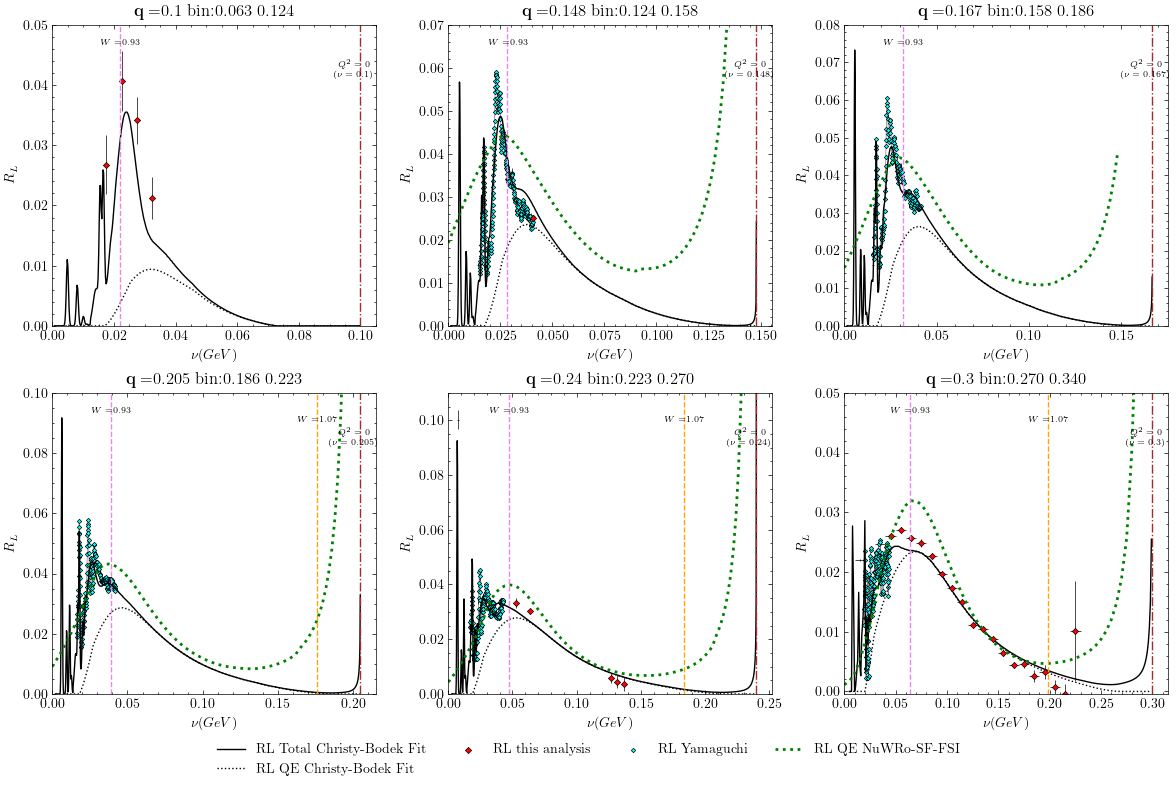

In [7]:
# 2x3 subplot grid to plot qv bin RL: bin 1 to 6
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

RL_total_Christy_Bodek = 0
RL_QE_Christy_Bodek = 0
RL_this_analysis = 0
RL_Yamaguchi = 0
RL_Jourdan = 0
RL_Barreau = 0
RL_NuWRo = 0

RL_NuWRo_SF = 0

plot_heights = [0.05,0.07,0.08,0.10,0.11,0.05]

RL_theory = 0
with PdfPages('figures/RL_journal_plots1.pdf') as pdf:
        
    for i, ax in enumerate(axs.flat):
        plot_height = plot_heights[i]
        qvcenter = qvcenters[i]
        qvcenter_data = Qvcenter_datas[i]
        qv2center = qvcenter**2
        qvbin_name = qvbin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]
   
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]

        Q2_grid = qvcenter**2-nu_grid**2
        Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid
        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            nu = nu_grid[j]
            Q2 = Q2_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            if Ex < 0:
                continue
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                RT = (2*b_opt*Q2/qv2center)/1000
                RTerr = (2*b_err*Q2/qv2center)/1000

                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                RLs.append(RL)
                RLerrs.append(RLerr)
                RTs.append(RT)
                RTerrs.append(RTerr)
                RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            responseq2_plotting = qvcenter_data
            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")
        if RL_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black',label="RL Total Christy-Bodek Fit", linestyle='solid')
            RL_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black', linestyle='solid')
        if RL_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black',label="RL QE Christy-Bodek Fit", linestyle='dotted') 
            RL_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black', linestyle='dotted')   
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
        
        # Yamaguchi
        Yam_RLmax = 0
        Yam_RTmax = 0
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            nu_ex30 = -2*mass_C12 + 2*np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*0.03)
            Yam_data = Yam_data.loc[Yam_data['nu_RL']<=nu_ex30]
            if RL_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',label="RL Yamaguchi",**scatter_setting)
                RL_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',**scatter_setting)
            ax.plot(Yam_data['nu_RL'],Yam_data["RL"],lw=0.5,color='gray',zorder=-2)
            Yam_RLmax = Yam_data["RL"].max()
            Yam_RTmax = Yam_data["RT"].max()

        
        ax.errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], xerr = fit['xerr'], color='red', **errorbar_setting)

        # this analysis
        if len(Yam_data) > 0:
            fit = fit.loc[fit['nu']>=Yam_data['nu_RL'].max()]

        if RL_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RL'],color='red',label='RL this analysis',**our_scatter_setting)
            RL_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RL'],color='red',**our_scatter_setting)
        ax.set_title("$\mathbf{q}=$"+str(qvcenter)+' bin:'+qvbin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_L$")
        
        # # Jourdan, Barreau
        # if qvcenter in Jourdan_qvs:
        #     Jourdan_data = pd.read_excel('Jourdan_RL_RT_plots.xlsx')
        #     Jourdan_data = Jourdan_data.loc[Jourdan_data['Q']==qvcenter]
        #     ax.errorbar(Jourdan_data['nu'],Jourdan_data["RL"], yerr = Jourdan_data["Error(RL)"], color='darkorange', **errorbar_setting)
        #     if RL_Jourdan == 0:
        #         ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='yellow',label="RL Jourdan", **scatter_setting)
        #         RL_Jourdan = 1
        #     else:
        #         ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='yellow',**scatter_setting)

        #     # plot barreau along with Ryan
        #     Bar_RL = pd.read_csv('Barreau/Barreau_RL_qvcenter_'+str(qvcenter)+'.csv')
        #     Bar_RT = pd.read_csv('Barreau/Barreau_RT_qvcenter_'+str(qvcenter)+'.csv')
        #     ax.errorbar(Bar_RL['nu'],Bar_RL["RLbc"], yerr = Bar_RL["RLerr_bc"], color='blue', **errorbar_setting)
        #     if RL_Barreau == 0:
        #         ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue',label="RL Barreau bin-centered", **scatter_setting)
        #         RL_Barreau = 1
        #     else:
        #         ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue', **scatter_setting)

        # NuWRo
        if qvcenter in SF_FSI_qvs:
            qvcenter_MeV = int(qvcenter*1000)
            df_SF = pd.read_csv('SF_FSI/Resp_FSI_12C_'+str(qvcenter_MeV)+'_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RL_NuWRo == 0:
                # ax.scatter(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',lw=2,linestyle='dotted')

                RL_NuWRo = 1
            else:
                # ax.scatter(df_SF['nu']/1000,df_SF['RL'],color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RL'],color='green',lw=2,linestyle='dotted')
        
        if qvcenter in SF_qvs:
            df_SF = pd.read_csv(f'SF/Resp_12C_{qvcenter}_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            df_SF['nu']=df_SF['nu']/1000
            df_SF['RL']=df_SF['RL']
            df_SF['RT']=df_SF['RT']
            if RL_NuWRo_SF == 0:
                # ax.scatter(df_SF['nu'],df_SF['RL'],label='RL QE NuWRo-SF',color='deeppink',s=5)
                ax.plot(df_SF['nu'],df_SF['RL'],label='RL QE NuWRo-SF',color='darkgoldenrod',linestyle='dotted',linewidth=2)
                RL_NuWRo_SF = 1
            else:
                # ax.scatter(df_SF['nu'],df_SF['RL'],color='plum',s=5)
                ax.plot(df_SF['nu'],df_SF['RL'],color='darkgoldenrod',linestyle='dotted',linewidth=2)
        # theory GFMC, RMF
        # if qvcenter in RLRT_theory_qvs:
        #     theory_gfmc = pd.read_csv(f"Eric/response-theory/rl_gfmc_qv{qvcenter}.dat",delimiter='\t')
        #     theory_gfmc.columns = ['nu','RL']
        #     theory_rmf = pd.read_csv(f"Eric/response-theory/rl_rmf_qv{qvcenter}.dat",delimiter='\t')
        #     theory_rmf.columns = ['nu','RL']
        #     if RL_theory == 0: 
        #         ax.plot(theory_gfmc['nu'],theory_gfmc['RL'], label = 'RL GFMC',color = 'tomato', linestyle='dashed')
        #         ax.plot(theory_rmf['nu'],theory_rmf['RL'], label = 'RL RMF',color = 'deepskyblue', linestyle='dashed')
        #     else:
        #         ax.plot(theory_gfmc['nu'],theory_gfmc['RL'],color = 'tomato', linestyle='dashed')
        #         ax.plot(theory_rmf['nu'],theory_rmf['RL'],color = 'deepskyblue', linestyle='dashed')


        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        W_colors = ['violet','orange','royalblue']
        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3

        # W peaks
        # 0.8649, 1.1449, 1.5129
        W_locations = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks**2)
        for k in range(len(W_peaks)):
            location = W_locations[k]
            # location = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks[k]**2)
            if location < qvcenter:
                ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
                if k == 0:
                    ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
                elif k == 1:
                    ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
                else:
                    ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]), **text_setting)
            
        ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        ax.text(qvcenter*0.98, plot_height, '\n\n\n\n$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)
        totalChi2 = np.sum(fit['Chi2'])


        ax.set_xlim(0.0, qvcenter*1.05)
        # if W_locations[2] > qvcenter:
        #     ax.set_xlim(0.0, W_locations[2]*1.05)
        
    
        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(axs0_y_low,plot_height)
        ax.set_ylim(axs0_y_low,plot_height)
        # ax.legend()

    plt.tight_layout()  # Optional, for better spacing between subplots
    plt.subplots_adjust(bottom=0.12)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/12356

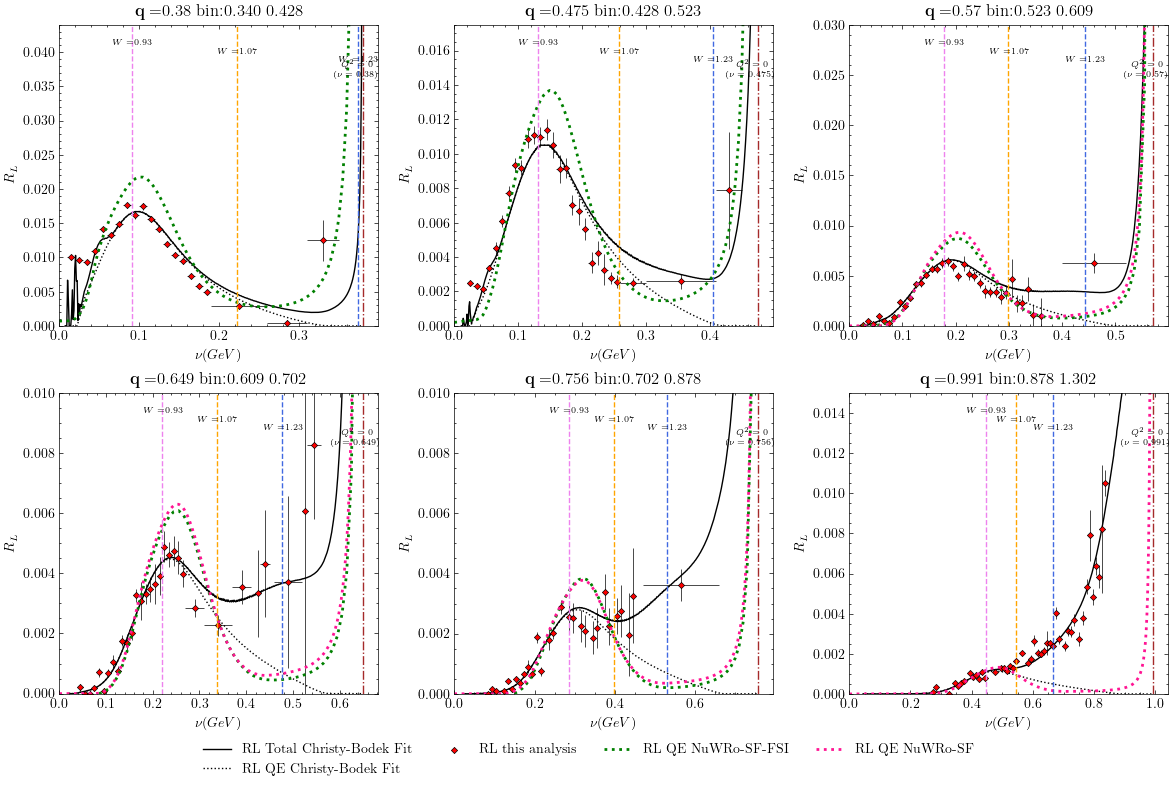

In [7]:
# 2x3 subplot grid to plot qv bin RL: bin 7 to 12
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

RL_total_Christy_Bodek = 0
RL_QE_Christy_Bodek = 0
RL_this_analysis = 0
RL_Yamaguchi = 0
RL_Jourdan = 0
RL_Barreau = 0
RL_NuWRo = 0
RL_NuWRo_SF = 0
RL_theory = 0

plot_heights = [0.0440, 0.0175, 0.030, 0.01, 0.01, 0.015]

with PdfPages('figures/RL_journal_plots2.pdf') as pdf:
        
    for plot_index, ax in enumerate(axs.flat):
        plot_height = plot_heights[plot_index]
        i = plot_index + 6
        qvcenter = qvcenters[i]
        qvcenter_data = Qvcenter_datas[i]
        qv2center = qvcenter**2
        qvbin_name = qvbin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]
      
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]

        Q2_grid = qvcenter**2-nu_grid**2
        Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid

        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            nu = nu_grid[j]
            Q2 = Q2_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            if Ex < 0:
                continue
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2<= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                RT = (2*b_opt*Q2/qv2center)/1000
                RTerr = (2*b_err*Q2/qv2center)/1000

                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                RLs.append(RL)
                RLerrs.append(RLerr)
                RTs.append(RT)
                RTerrs.append(RTerr)
                RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            responseq2_plotting = qvcenter_data
            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")
        if RL_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black',label="RL Total Christy-Bodek Fit", linestyle='solid')
            RL_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black', linestyle='solid')
        if RL_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black',label="RL QE Christy-Bodek Fit", linestyle='dotted') 
            RL_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black', linestyle='dotted')   

        # Yamaguchi
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            nu_ex30 = -2*mass_C12 + 2*np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*0.03)
            Yam_data = Yam_data.loc[Yam_data['nu_RL']<=nu_ex30]
            if RL_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',label="RL Yamaguchi",**scatter_setting)
                RL_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',**scatter_setting)
            ax.plot(Yam_data['nu_RL'],Yam_data["RL"],lw=0.5,color='gray',zorder=-2)
            Yam_RLmax = Yam_data["RL"].max()
            Yam_RTmax = Yam_data["RT"].max()
  
        ax.errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], xerr = fit['xerr'], color='red', **errorbar_setting)

        if len(Yam_data) > 0:
            fit = fit.loc[fit['nu']>=Yam_data['nu_RL'].max()]
        if RL_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RL'],color='red',label='RL this analysis',**our_scatter_setting)
            RL_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RL'],color='red',**our_scatter_setting)
        ax.set_title("$\mathbf{q}=$"+str(qvcenter)+' bin:'+qvbin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_L$")
        
        # if qvcenter in Jourdan_qvs:
        #     Jourdan_data = pd.read_excel('Jourdan_RL_RT_plots.xlsx')
        #     Jourdan_data = Jourdan_data.loc[Jourdan_data['Q']==qvcenter]
        #     ax.errorbar(Jourdan_data['nu'],Jourdan_data["RL"], yerr = Jourdan_data["Error(RL)"], color='darkorange', **errorbar_setting)
        #     if RL_Jourdan == 0:
        #         ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='yellow',label="RL Jourdan", **scatter_setting)
        #         RL_Jourdan = 1
        #     else:
        #         ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='yellow',**scatter_setting)

        #     # plot barreau along with Ryan
        #     Bar_RL = pd.read_csv('Barreau/Barreau_RL_qvcenter_'+str(qvcenter)+'.csv')
        #     Bar_RT = pd.read_csv('Barreau/Barreau_RT_qvcenter_'+str(qvcenter)+'.csv')
        #     ax.errorbar(Bar_RL['nu'],Bar_RL["RLbc"], yerr = Bar_RL["RLerr_bc"], color='blue', **errorbar_setting)
        #     if RL_Barreau == 0:
        #         ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue',label="RL Barreau bin-centered", **scatter_setting)
        #         RL_Barreau = 1
        #     else:
        #         ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue', **scatter_setting)
            
        # NuWRo
        if qvcenter in SF_FSI_qvs:
            qvcenter_MeV = int(qvcenter*1000)
            df_SF = pd.read_csv('SF_FSI/Resp_FSI_12C_'+str(qvcenter_MeV)+'_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RL_NuWRo == 0:
                # ax.scatter(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',lw=2,linestyle='dotted')

                RL_NuWRo = 1
            else:
                # ax.scatter(df_SF['nu']/1000,df_SF['RL'],color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RL'],color='green',lw=2,linestyle='dotted')
        
        if qvcenter in SF_qvs:
            df_SF = pd.read_csv(f'SF/Resp_12C_{qvcenter}_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            df_SF['nu']=df_SF['nu']/1000
            df_SF['RL']=df_SF['RL']
            df_SF['RT']=df_SF['RT']
            if RL_NuWRo_SF == 0:
                # ax.scatter(df_SF['nu'],df_SF['RL'],label='RL QE NuWRo-SF',color='deeppink',s=5)
                ax.plot(df_SF['nu'],df_SF['RL'],label='RL QE NuWRo-SF',color='deeppink',linestyle='dotted',linewidth=2)
                RL_NuWRo_SF = 1
            else:
                # ax.scatter(df_SF['nu'],df_SF['RL'],color='plum',s=5)
                ax.plot(df_SF['nu'],df_SF['RL'],color='deeppink',linestyle='dotted',linewidth=2)


        # # theory GFMC, RMF
        # if qvcenter in RLRT_theory_qvs:
        #     theory_gfmc = pd.read_csv(f"Eric/response-theory/rl_gfmc_qv{qvcenter}.dat",delimiter='\t')
        #     theory_gfmc.columns = ['nu','RL']
        #     theory_rmf = pd.read_csv(f"Eric/response-theory/rl_rmf_qv{qvcenter}.dat",delimiter='\t')
        #     theory_rmf.columns = ['nu','RL']
        #     if RL_theory == 0: 
        #         ax.plot(theory_gfmc['nu'],theory_gfmc['RL'], label = 'RL GFMC',color = 'tomato', linestyle='dashed')
        #         ax.plot(theory_rmf['nu'],theory_rmf['RL'], label = 'RL RMF',color = 'deepskyblue', linestyle='dashed')
        #         RL_theory = 1
        #     else:
        #         ax.plot(theory_gfmc['nu'],theory_gfmc['RL'],color = 'tomato', linestyle='dashed')
        #         ax.plot(theory_rmf['nu'],theory_rmf['RL'],color = 'deepskyblue', linestyle='dashed')

        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        W_colors = ['violet','orange','royalblue']

        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3
        W_locations = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks**2)
        

        # 0.8649, 1.1449, 1.5129
        for k in range(len(W_peaks)):
            location = W_locations[k]
            if location < qvcenter:
                ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
                if k == 0:
                    ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
                elif k == 1:
                    ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
                else:
                    ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]), **text_setting)

        ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        ax.text(qvcenter*0.98, plot_height, '\n\n\n\n$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)

        ax.set_xlim(0.0, qvcenter*1.05)
        # if W_locations[2] > qvcenter:
        #     ax.set_xlim(0.0, W_locations[2]*1.05)

        axs0_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(axs0_y_low,plot_height)
        ax.set_ylim(axs0_y_low,plot_height)
        # ax.set_ylim(axs0_y_low,fit['RL'].max()*1.3)


    plt.tight_layout()  # Optional, for better spacing between subplots

    plt.subplots_adjust(bottom=0.12)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/12356

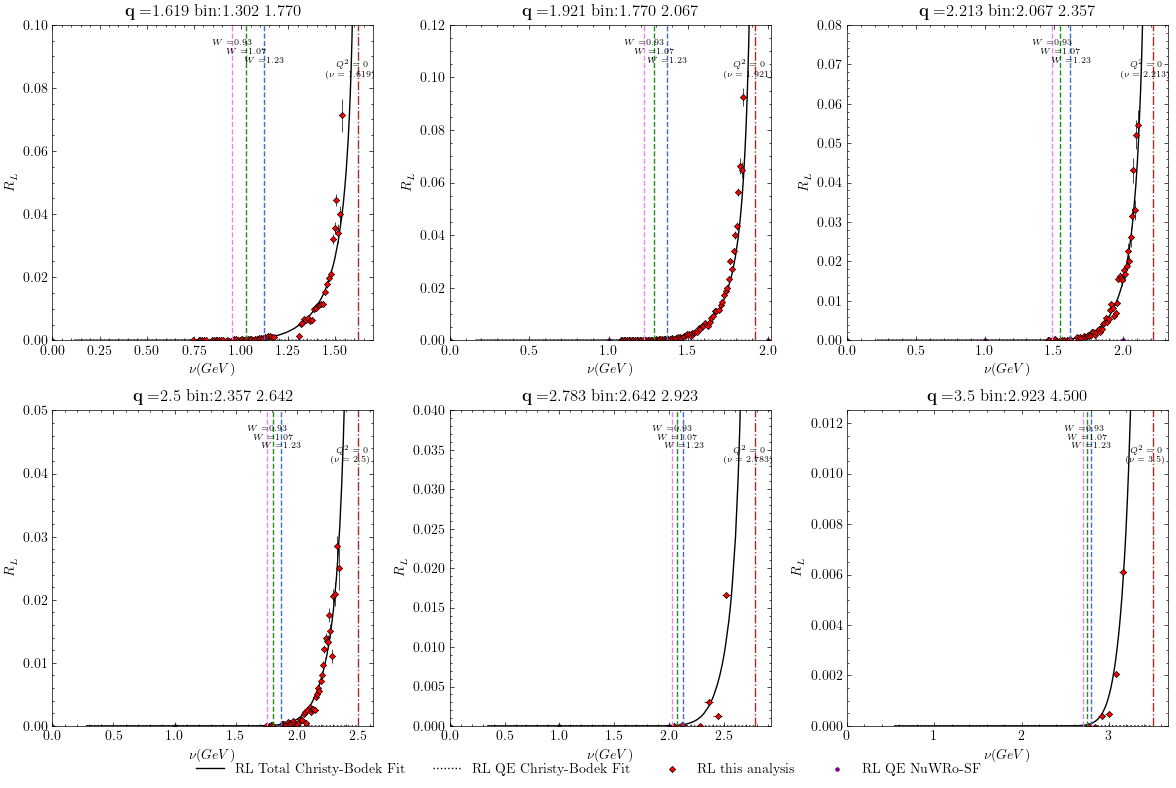

In [22]:
# 2x3 subplot grid to plot qv bin RL: bin 13 to 18
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

RL_total_Christy_Bodek = 0
RL_QE_Christy_Bodek = 0
RL_this_analysis = 0
RL_Yamaguchi = 0
RL_Jourdan = 0
RL_Barreau = 0
RL_NuWRo = 0
RL_NuWRo_SF = 0
Yamaguchi_qvs = [0.148,0.167,0.205,0.24,0.3]
Jourdan_qvs = [0.3,0.38,0.57]
Barr_qvs = [0.3,0.4,0.55,]
SF_FSI_qvs = [0.148,0.167,0.205,0.24,0.3,0.38,0.475,0.57,0.649,0.756]

plot_heights = [0.1,0.12,0.08,0.05,0.04,0.0125]

with PdfPages('figures/RL_journal_plots3.pdf') as pdf:
        
    for plot_index, ax in enumerate(axs.flat):
        plot_height = plot_heights[plot_index]
        i = plot_index + 12
        qvcenter = qvcenters[i]
        qvcenter_data = Qvcenter_datas[i]
        qv2center = qvcenter**2
        qvbin_name = qvbin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]


        
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]

        Q2_grid = qvcenter**2-nu_grid**2
        Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid

        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            nu = nu_grid[j]
            Q2 = Q2_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            if Ex < 0:
                continue
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                RT = (2*b_opt*Q2/qv2center)/1000
                RTerr = (2*b_err*Q2/qv2center)/1000

                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                RLs.append(RL)
                RLerrs.append(RLerr)
                RTs.append(RT)
                RTerrs.append(RTerr)
                RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            responseq2_plotting = qvcenter_data
            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")
        if RL_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black',label="RL Total Christy-Bodek Fit", linestyle='solid')
            RL_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black', linestyle='solid')
        if RL_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black',label="RL QE Christy-Bodek Fit", linestyle='dotted') 
            RL_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black', linestyle='dotted')   
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
            
        Yam_RLmax = 0
        Yam_RTmax = 0
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            if RL_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',label="RL Yamaguchi",**scatter_setting)
                RL_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',**scatter_setting)
            ax.plot(Yam_data['nu_RL'],Yam_data["RL"],lw=0.5,color='gray',zorder=-2)
            Yam_RLmax = Yam_data["RL"].max()
            Yam_RTmax = Yam_data["RT"].max()

        
        ax.errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], xerr = fit['xerr'], color='red', **errorbar_setting)

        if len(Yam_data) > 0:
            fit = fit.loc[fit['nu']>=Yam_data['nu_RL'].max()*0.9]
        if RL_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RL'],color='red',label='RL this analysis',**our_scatter_setting)
            RL_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RL'],color='red',**our_scatter_setting)
        ax.set_title("$\mathbf{q}=$"+str(qvcenter)+' bin:'+qvbin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_L$")
        
        if qvcenter in Jourdan_qvs:
            Jourdan_data = pd.read_excel('Jourdan_RL_RT_plots.xlsx')
            Jourdan_data = Jourdan_data.loc[Jourdan_data['Q']==qvcenter]
            ax.errorbar(Jourdan_data['nu'],Jourdan_data["RL"], yerr = Jourdan_data["Error(RL)"], color='darkorange', **errorbar_setting)
            if RL_Jourdan == 0:
                ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='yellow',label="RL Jourdan", **scatter_setting)
                RL_Jourdan = 1
            else:
                ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='yellow',**scatter_setting)

            # plot barreau along with Ryan
            Bar_RL = pd.read_csv('Barreau/Barreau_RL_qvcenter_'+str(qvcenter)+'.csv')
            Bar_RT = pd.read_csv('Barreau/Barreau_RT_qvcenter_'+str(qvcenter)+'.csv')
            ax.errorbar(Bar_RL['nu'],Bar_RL["RLbc"], yerr = Bar_RL["RLerr_bc"], color='blue', **errorbar_setting)
            if RL_Barreau == 0:
                ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue',label="RL Barreau bin-centered", **scatter_setting)
                RL_Barreau = 1
            else:
                ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue', **scatter_setting)

            
        # NuWRo
        if qvcenter in SF_FSI_qvs:
            qvcenter_MeV = int(qvcenter*1000)
            df_SF = pd.read_csv('SF_FSI/Resp_FSI_12C_'+str(qvcenter_MeV)+'_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RL_NuWRo == 0:
                ax.scatter(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',s=5)
                RL_NuWRo = 1
            else:
                ax.scatter(df_SF['nu']/1000,df_SF['RL'],color='green',s=5)

        if qvcenter in SF_qvs:
            df_SF = pd.read_csv(f'SF/Resp_12C_{qvcenter}_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RL_NuWRo_SF == 0:
                ax.scatter(df_SF['nu'],df_SF['RL'],label='RL QE NuWRo-SF',color='purple',s=5)
                RL_NuWRo_SF = 1
            else:
                ax.scatter(df_SF['nu'],df_SF['RL'],color='purple',s=5)


        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        W_colors = ['violet','forestgreen','royalblue']
        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3

        # 0.8649, 1.1449, 1.5129
        for k in range(len(W_peaks)):
            location = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks[k]**2)
            if location < qvcenter:
                ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
                if k == 0:
                    ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
                elif k == 1:
                    ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
                else:
                    ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]), **text_setting)

                
        ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        ax.text(qvcenter*0.98, plot_height, '\n\n\n\n$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)
        totalChi2 = np.sum(fit['Chi2'])


        ax.set_xlim(0.0, qvcenter*1.05)
    
        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(axs0_y_low,plot_height)
        # ax.set_ylim(axs0_y_low,plot_height)
        ax.set_ylim(0,plot_height)

    plt.tight_layout()  # Optional, for better spacing between subplots
    plt.subplots_adjust(bottom=0.08)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)


In [51]:
merger = PdfMerger() # merge RL qv plots
for i in [1,2,3]:
    merger.append('figures/RL_journal_plots'+str(i)+'.pdf')
# merger.write("RLRT_Q2bins.pdf")
merger.write('figures/RL_qv.pdf')
merger.close()


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/1649049279.py:1: DeprecationWarning: PdfMerger is deprecated and will be removed in pypdf 5.0.0. Use PdfWriter instead.
  merger = PdfMerger() # merge RL qv plots


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/12356

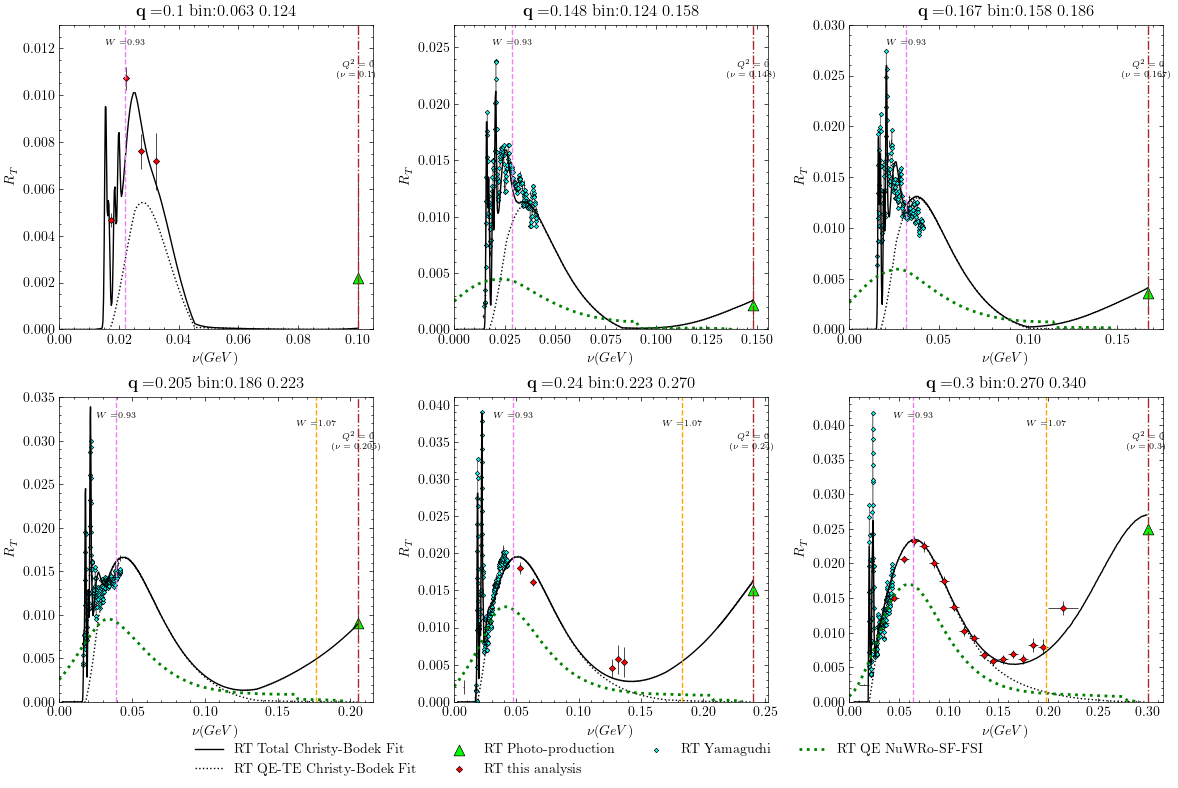

In [19]:
# 2x3 subplot grid to plot qv bin RT: bin 1 to 6
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

RT_total_Christy_Bodek = 0
RT_QE_Christy_Bodek = 0
RT_this_analysis = 0
RT_Yamaguchi = 0
RT_Jourdan = 0
RT_Barreau = 0
RT_NuWRo = 0
RT_NuWRo_SF = 0
RT_Goldemberg = 0
RT_photo = 0
Yamaguchi_qvs = [0.148,0.167,0.205,0.24,0.3]
Jourdan_qvs = [0.3,0.38,0.57]
Barr_qvs = [0.3,0.4,0.55,]
SF_FSI_qvs = [0.148,0.167,0.205,0.24,0.3,0.38,0.475,0.57,0.649,0.756]

plot_heights = [0.013,0.027,0.03,0.035,0.041,0.044]

with PdfPages('figures/RT_journal_plots1.pdf') as pdf:
    
    for i, ax in enumerate(axs.flat):
        plot_height = plot_heights[i]
        qvcenter = qvcenters[i]
        qvcenter_data = Qvcenter_datas[i]
        qv2center = qvcenter**2
        qvbin_name = qvbin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]


        
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]

        Q2_grid = qvcenter**2-nu_grid**2
        Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid

        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            nu = nu_grid[j]
            Q2 = Q2_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            if Ex < 0:
                continue
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                RT = (2*b_opt*Q2/qv2center)/1000
                RTerr = (2*b_err*Q2/qv2center)/1000

                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                RLs.append(RL)
                RLerrs.append(RLerr)
                RTs.append(RT)
                RTerrs.append(RTerr)
                RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            responseq2_plotting = qvcenter_data
            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")

        if RT_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black',label="RT Total Christy-Bodek Fit", linestyle='solid')
            RT_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black', linestyle='solid')
        
        if RT_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"]+responseq2_plotting["RTE"],color='black',label="RT QE-TE Christy-Bodek Fit", linestyle='dotted') 
            RT_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"]+responseq2_plotting["RTE"],color='black', linestyle='dotted')
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
        
        # photon_index = (Photon_plotting['nu'] - qvcenter).abs().idxmin()
        # photon_data = Photon_plotting.loc[photon_index]

        photon_data, photon_data_err = photon_locator(Photon_plotting,qvcenter)
        if RT_photo == 0:
            # ax.scatter(np.array(qvcenter),np.array(photon_data),marker='^',s=40,color='lime',label="RT Photo-production")
            ax.scatter(np.array(qvcenter),np.array(photon_data),label="RT Photo-production",**photo_scatter_setting)
            RT_photo = 1
        else:
            ax.scatter(np.array(qvcenter),np.array(photon_data),**photo_scatter_setting)
        ax.errorbar(np.array(qvcenter),np.array(photon_data),yerr = np.array(photon_data_err),**errorbar_setting)

        # Yamaguchi
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            nu_ex30 = -2*mass_C12 + 2*np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*0.03)
            Yam_data = Yam_data.loc[Yam_data['nu_RT']<=nu_ex30]
            if RT_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',label="RT Yamaguchi",**scatter_setting)
                RT_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',**scatter_setting)

            ax.plot(Yam_data['nu_RT'],Yam_data["RT"],lw=0.5,color='gray',zorder=-2)
            Yam_RLmax = Yam_data["RL"].max()
            Yam_RTmax = Yam_data["RT"].max()

        
        ax.errorbar(fit['nu'], fit['RT'], yerr = fit['RTerr'],xerr = fit['xerr'], color='red', **errorbar_setting)


        if len(Yam_data) > 0:
            # fit = fit.loc[fit['nu']>=Yam_data['nu_RL'].max()*0.9]
            fit = fit.loc[fit['nu']>=Yam_data['nu_RT'].max()]
        if RT_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RT'],color='red',label='RT this analysis',**our_scatter_setting)
            RT_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RT'],color='red',**our_scatter_setting)
        ax.set_title("$\mathbf{q}=$"+str(qvcenter)+' bin:'+qvbin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_T$")
        
        # if qvcenter in Jourdan_qvs:
        #     Jourdan_data = pd.read_excel('Jourdan_RL_RT_plots.xlsx')
        #     Jourdan_data = Jourdan_data.loc[Jourdan_data['Q']==qvcenter]
        #     # ax.errorbar(Jourdan_data['nu'],Jourdan_data["RL"], yerr = Jourdan_data["Error(RL)"], color='darkorange', **errorbar_setting)
        #     # if RL_Jourdan == 0:
        #     #     ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='darkorange',label="RL Jourdan", **scatter_setting)
        #     #     RL_Jourdan = 1
        #     # else:
        #     #     ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='darkorange',**scatter_setting)

        #     ax.errorbar(Jourdan_data['nu'],Jourdan_data["RT"], yerr = Jourdan_data["Error(RT)"], color='darkorange', **errorbar_setting)
        #     if RT_Jourdan == 0:
        #         ax.scatter(Jourdan_data['nu'],Jourdan_data["RT"],color='yellow',label="RT Jourdan", **scatter_setting)
        #         RT_Jourdan = 1
        #     else:
        #         ax.scatter(Jourdan_data['nu'],Jourdan_data["RT"],color='yellow', **scatter_setting)

        #     # plot barreau along with Ryan
        #     Bar_RL = pd.read_csv('Barreau/Barreau_RL_qvcenter_'+str(qvcenter)+'.csv')
        #     Bar_RT = pd.read_csv('Barreau/Barreau_RT_qvcenter_'+str(qvcenter)+'.csv')
        #     # ax.errorbar(Bar_RL['nu'],Bar_RL["RLbc"], yerr = Bar_RL["RLerr_bc"], color='blue', **errorbar_setting)
        #     # if RL_Barreau == 0:
        #     #     ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue',label="RL Barreau bin-centered", **scatter_setting)
        #     #     RL_Barreau = 1
        #     # else:
        #     #     ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue', **scatter_setting)
            
        #     ax.errorbar(Bar_RT['nu'],Bar_RT["RTbc"], yerr = Bar_RT["RTerr_bc"], color='blue', **errorbar_setting)
        #     if RT_Barreau == 0:
        #         ax.scatter(Bar_RT['nu'],Bar_RT["RTbc"],color='blue',label="RT Barreau bin-centered", **scatter_setting)
        #         RT_Barreau = 1
        #     else:
        #         ax.scatter(Bar_RT['nu'],Bar_RT["RTbc"],color='blue', **scatter_setting)

        # Yam_RLmax = 0
        # Yam_RTmax = 0
        # if qvcenter in Yamaguchi_qvs:
        #     Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
        #     if RL_Yamaguchi == 0:
        #         ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',label="RL Yamaguchi",**scatter_setting)
        #         RL_Yamaguchi = 1
        #     else:
        #         ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',**scatter_setting)
        #     ax.plot(Yam_data['nu_RL'],Yam_data["RL"],lw=0.5,color='gray',zorder=-2)
        #     Yam_RLmax = Yam_data["RL"].max()
        #     Yam_RTmax = Yam_data["RT"].max()
        
        # # goldemberg
        # if qvcenter == 0.1: 
        #     Goldem_data = pd.read_csv('Goldemberger_180.csv')
        #     ax.errorbar(Goldem_data['nu'],Goldem_data["RT"], yerr = Goldem_data["error"], color='skyblue', **errorbar_setting)
        #     ax.scatter(Goldem_data['nu'],Goldem_data["RT"],color='blue',label="RT Goldemberg",**scatter_setting)
            
        # NuWRo
        if qvcenter in SF_FSI_qvs:
            qvcenter_MeV = int(qvcenter*1000)
            df_SF = pd.read_csv('SF_FSI/Resp_FSI_12C_'+str(qvcenter_MeV)+'_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RT_NuWRo == 0:
                # ax.scatter(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RT'],label='RT QE NuWRo-SF-FSI',color='green',lw=2,linestyle='dotted')

                RT_NuWRo = 1
            else:
                # ax.scatter(df_SF['nu']/1000,df_SF['RL'],color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RT'],color='green',lw=2,linestyle='dotted')
        
        if qvcenter in SF_qvs:
            df_SF = pd.read_csv(f'SF/Resp_12C_{qvcenter}_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            df_SF['nu']=df_SF['nu']/1000
            if RT_NuWRo_SF == 0:
                # ax.scatter(df_SF['nu'],df_SF['RL'],label='RL QE NuWRo-SF',color='deeppink',s=5)
                ax.plot(df_SF['nu'],df_SF['RT'],label='RT QE NuWRo-SF',color='deeppink',linestyle='dotted',linewidth=2)
                RT_NuWRo_SF = 1
            else:
                # ax.scatter(df_SF['nu'],df_SF['RL'],color='plum',s=5)
                ax.plot(df_SF['nu'],df_SF['RT'],color='deeppink',linestyle='dotted',linewidth=2)

        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        W_colors = ['violet','orange','royalblue']
        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3
        W_locations = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks**2)

        for k in range(len(W_peaks)):
            # location = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks[k]**2)
            location = W_locations[k]
            if location < qvcenter:
                ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
                if k == 0:
                    ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
                elif k == 1:
                    ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
                else:
                    ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]),**text_setting)


        ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        ax.text(qvcenter, plot_height, '\n\n\n\n$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)
        totalChi2 = np.sum(fit['Chi2'])

        ax.set_xlim(0.0, qvcenter*1.05)
        # if qvcenter < W_locations[2]:
        #     ax.set_xlim(0.0, W_locations[2]*1.05)
    
        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(0, plot_height)
        ax.set_ylim(axs1_y_low, plot_height)


    plt.tight_layout()  # Optional, for better spacing between subplots
    plt.subplots_adjust(bottom=0.11)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/12356

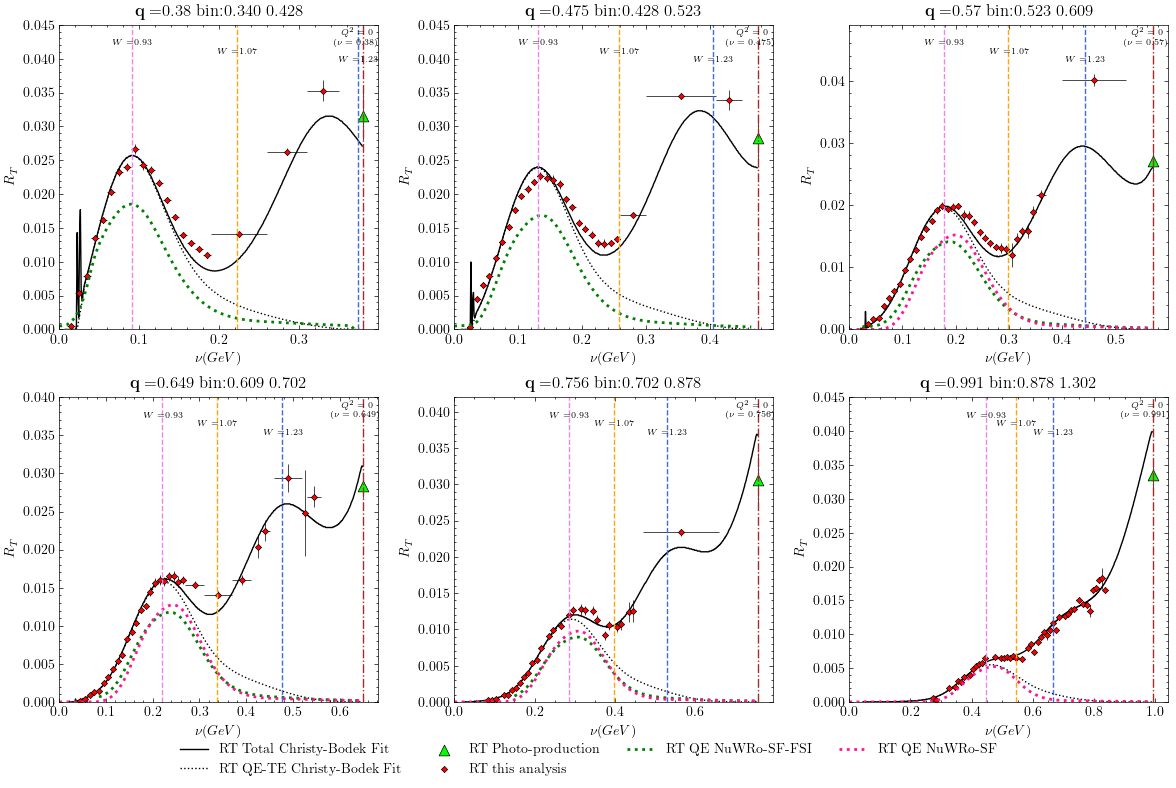

In [20]:
# 2x3 subplot grid to plot qv bin RT: bin 7 to 12
fig, axs = plt.subplots(2, 3, figsize=(12,8))

RT_total_Christy_Bodek = 0
RT_QE_Christy_Bodek = 0
RT_this_analysis = 0
RT_Yamaguchi = 0
RT_Jourdan = 0
RT_Barreau = 0
RT_NuWRo = 0
RT_NuWRo_SF = 0
RT_Goldemberg = 0
RT_photo = 0
Yamaguchi_qvs = [0.148,0.167,0.205,0.24,0.3]
Jourdan_qvs = [0.3,0.38,0.57]
Barr_qvs = [0.3,0.4,0.55,]
SF_FSI_qvs = [0.148,0.167,0.205,0.24,0.3,0.38,0.475,0.57,0.649,0.756]

plot_heights = [0.045,0.045,0.049,0.04,0.042,0.045]

with PdfPages('figures/RT_journal_plots2.pdf') as pdf:
    
    for plot_index, ax in enumerate(axs.flat):
        plot_height = plot_heights[plot_index]
        i = plot_index + 6
        qvcenter = qvcenters[i]
        qvcenter_data = Qvcenter_datas[i]
        qv2center = qvcenter**2
        qvbin_name = qvbin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]


        
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]

        Q2_grid = qvcenter**2-nu_grid**2
        Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid

        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            nu = nu_grid[j]
            Q2 = Q2_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            if Ex < 0:
                continue
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                RT = (2*b_opt*Q2/qv2center)/1000
                RTerr = (2*b_err*Q2/qv2center)/1000

                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                RLs.append(RL)
                RLerrs.append(RLerr)
                RTs.append(RT)
                RTerrs.append(RTerr)
                RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            responseq2_plotting = qvcenter_data

            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")

        if RT_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black',label="RT Total Christy-Bodek Fit", linestyle='solid')
            RT_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black', linestyle='solid')
        
        if RT_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"]+responseq2_plotting["RTE"],color='black',label="RT QE-TE Christy-Bodek Fit", linestyle='dotted') 
            RT_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"]+responseq2_plotting["RTE"],color='black', linestyle='dotted')
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
        
        # photon_index = (Photon_plotting['nu'] - qvcenter).abs().idxmin()
        # photon_data = Photon_plotting.loc[photon_index]

        photon_data, photon_data_err = photon_locator(Photon_plotting,qvcenter)
        if RT_photo == 0:
            # ax.scatter(np.array(qvcenter),np.array(photon_data),marker='^',s=40,color='lime',label="RT Photo-production")
            ax.scatter(np.array(qvcenter),np.array(photon_data),label="RT Photo-production",**photo_scatter_setting)
            RT_photo = 1
        else:
            ax.scatter(np.array(qvcenter),np.array(photon_data),**photo_scatter_setting)
        ax.errorbar(np.array(qvcenter),np.array(photon_data),yerr = np.array(photon_data_err),**errorbar_setting)


        # if RT_photo == 0:
        #     ax.scatter(photon_data['nu'],photon_data["RT"],marker='^',s=40,color='lime',label="RT Photo-production")
        #     RT_photo = 1
        # else:
        #     ax.scatter(photon_data['nu'],photon_data["RT"],marker='^',s=40,color='lime')

        # Yamaguchi
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            nu_ex30 = -2*mass_C12 + 2*np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*0.03)
            Yam_data = Yam_data.loc[Yam_data['nu_RT']<=nu_ex30]
            if RT_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',label="RT Yamaguchi",**scatter_setting)
                RT_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',**scatter_setting)

            ax.plot(Yam_data['nu_RT'],Yam_data["RT"],lw=0.5,color='gray',zorder=-2)
            Yam_RLmax = Yam_data["RL"].max()
            Yam_RTmax = Yam_data["RT"].max()

        
        ax.errorbar(fit['nu'], fit['RT'], yerr = fit['RTerr'],xerr = fit['xerr'], color='red', **errorbar_setting)

        if len(Yam_data) > 0:
            # fit = fit.loc[fit['nu']>=Yam_data['nu_RL'].max()*0.9]
            fit = fit.loc[fit['nu']>=Yam_data['nu_RT'].max()]
        if RT_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RT'],color='red',label='RT this analysis',**our_scatter_setting)
            RT_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RT'],color='red',**our_scatter_setting)
        ax.set_title("$\mathbf{q}=$"+str(qvcenter)+' bin:'+qvbin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_T$")
        
        # if qvcenter in Jourdan_qvs:
        #     Jourdan_data = pd.read_excel('Jourdan_RL_RT_plots.xlsx')
        #     Jourdan_data = Jourdan_data.loc[Jourdan_data['Q']==qvcenter]
        #     # ax.errorbar(Jourdan_data['nu'],Jourdan_data["RL"], yerr = Jourdan_data["Error(RL)"], color='darkorange', **errorbar_setting)
        #     # if RL_Jourdan == 0:
        #     #     ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='darkorange',label="RL Jourdan", **scatter_setting)
        #     #     RL_Jourdan = 1
        #     # else:
        #     #     ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='darkorange',**scatter_setting)

        #     ax.errorbar(Jourdan_data['nu'],Jourdan_data["RT"], yerr = Jourdan_data["Error(RT)"], color='darkorange', **errorbar_setting)
        #     if RT_Jourdan == 0:
        #         ax.scatter(Jourdan_data['nu'],Jourdan_data["RT"],color='yellow',label="RT Jourdan", **scatter_setting)
        #         RT_Jourdan = 1
        #     else:
        #         ax.scatter(Jourdan_data['nu'],Jourdan_data["RT"],color='yellow', **scatter_setting)

        #     # plot barreau along with Ryan
        #     Bar_RL = pd.read_csv('Barreau/Barreau_RL_qvcenter_'+str(qvcenter)+'.csv')
        #     Bar_RT = pd.read_csv('Barreau/Barreau_RT_qvcenter_'+str(qvcenter)+'.csv')
        #     # ax.errorbar(Bar_RL['nu'],Bar_RL["RLbc"], yerr = Bar_RL["RLerr_bc"], color='blue', **errorbar_setting)
        #     # if RL_Barreau == 0:
        #     #     ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue',label="RL Barreau bin-centered", **scatter_setting)
        #     #     RL_Barreau = 1
        #     # else:
        #     #     ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue', **scatter_setting)
            
        #     ax.errorbar(Bar_RT['nu'],Bar_RT["RTbc"], yerr = Bar_RT["RTerr_bc"], color='blue', **errorbar_setting)
        #     if RT_Barreau == 0:
        #         ax.scatter(Bar_RT['nu'],Bar_RT["RTbc"],color='blue',label="RT Barreau bin-centered", **scatter_setting)
        #         RT_Barreau = 1
        #     else:
        #         ax.scatter(Bar_RT['nu'],Bar_RT["RTbc"],color='blue', **scatter_setting)

        # Yam_RLmax = 0
        # Yam_RTmax = 0
        # if qvcenter in Yamaguchi_qvs:
        #     Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
        #     if RL_Yamaguchi == 0:
        #         ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',label="RL Yamaguchi",**scatter_setting)
        #         RL_Yamaguchi = 1
        #     else:
        #         ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',**scatter_setting)
        #     ax.plot(Yam_data['nu_RL'],Yam_data["RL"],lw=0.5,color='gray',zorder=-2)
        #     Yam_RLmax = Yam_data["RL"].max()
        #     Yam_RTmax = Yam_data["RT"].max()
        
        # # goldemberg
        # if qvcenter == 0.1: 
        #     Goldem_data = pd.read_csv('Goldemberger_180.csv')
        #     ax.errorbar(Goldem_data['nu'],Goldem_data["RT"], yerr = Goldem_data["error"], color='skyblue', **errorbar_setting)
        #     ax.scatter(Goldem_data['nu'],Goldem_data["RT"],color='blue',label="RT Goldemberg",**scatter_setting)
            
            
        # NuWRo
        if qvcenter in SF_FSI_qvs:
            qvcenter_MeV = int(qvcenter*1000)
            df_SF = pd.read_csv('SF_FSI/Resp_FSI_12C_'+str(qvcenter_MeV)+'_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RT_NuWRo == 0:
                # ax.scatter(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RT'],label='RT QE NuWRo-SF-FSI',color='green',lw=2,linestyle='dotted')

                RT_NuWRo = 1
            else:
                # ax.scatter(df_SF['nu']/1000,df_SF['RL'],color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RT'],color='green',lw=2,linestyle='dotted')
        
        if qvcenter in SF_qvs:
            df_SF = pd.read_csv(f'SF/Resp_12C_{qvcenter}_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            df_SF['nu']=df_SF['nu']/1000
            if RT_NuWRo_SF == 0:
                # ax.scatter(df_SF['nu'],df_SF['RL'],label='RL QE NuWRo-SF',color='deeppink',s=5)
                ax.plot(df_SF['nu'],df_SF['RT'],label='RT QE NuWRo-SF',color='deeppink',linestyle='dotted',linewidth=2)
                RT_NuWRo_SF = 1
            else:
                # ax.scatter(df_SF['nu'],df_SF['RL'],color='plum',s=5)
                ax.plot(df_SF['nu'],df_SF['RT'],color='deeppink',linestyle='dotted',linewidth=2)



        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        W_colors = ['violet','orange','royalblue']
        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3
        W_locations = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks**2)

        for k in range(len(W_peaks)):
            # location = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks[k]**2)
            location = W_locations[k]
            if location < qvcenter:
                ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
                if k == 0:
                    ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
                elif k == 1:
                    ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
                else:
                    ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]),**text_setting)

        ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        ax.text(qvcenter*0.98, plot_height*0.99, '$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)
        totalChi2 = np.sum(fit['Chi2'])

        ax.set_xlim(0.0, qvcenter*1.05)
        # if qvcenter < W_locations[2]:
        #     ax.set_xlim(0.0, W_locations[2]*1.05)
    
        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(0, plot_height)
        ax.set_ylim(axs1_y_low, plot_height)

    plt.tight_layout()  # Optional, for better spacing between subplots
    plt.subplots_adjust(bottom=0.11)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/12356

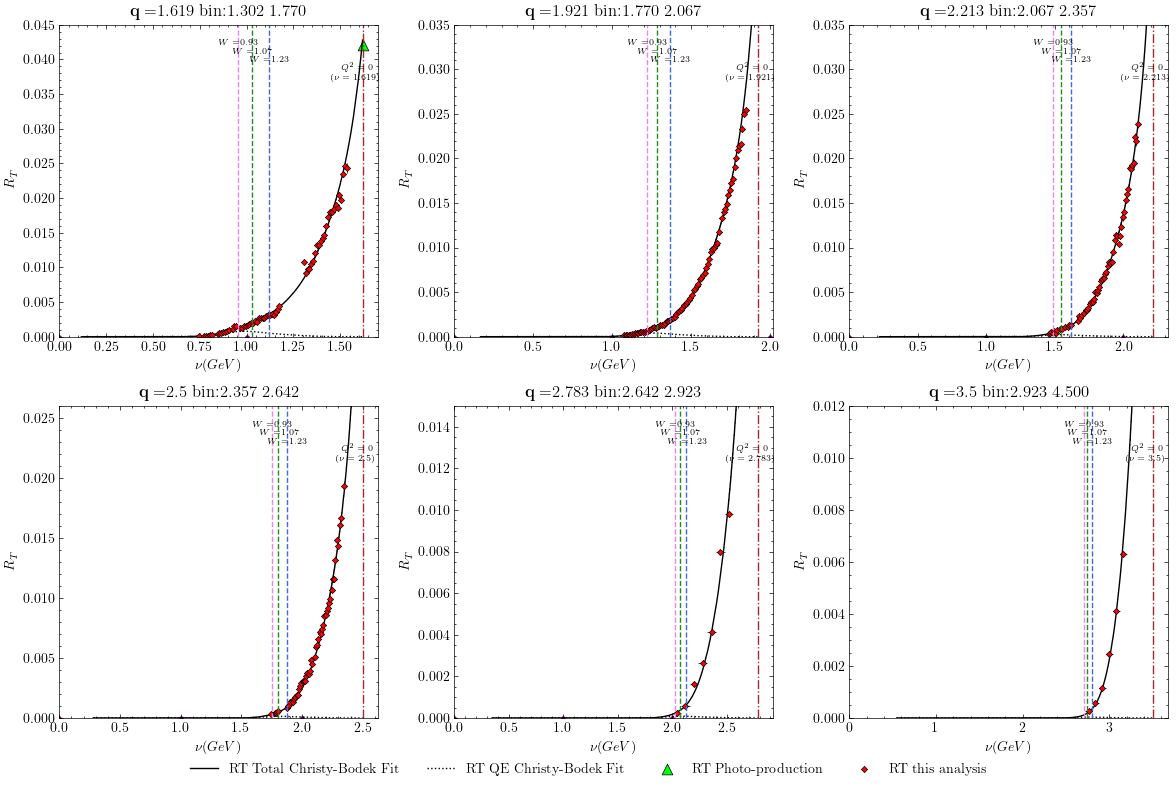

In [26]:
# 2x3 subplot grid to plot qv bin RT: bin 13 to 18
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

RT_total_Christy_Bodek = 0
RT_QE_Christy_Bodek = 0
RT_this_analysis = 0
RT_Yamaguchi = 0
RT_Jourdan = 0
RT_Barreau = 0
RT_NuWRo = 0
RT_NuWRo_SF = 0
RT_Goldemberg = 0
RT_photo = 0
Yamaguchi_qvs = [0.148,0.167,0.205,0.24,0.3]
Jourdan_qvs = [0.3,0.38,0.57]
Barr_qvs = [0.3,0.4,0.55,]
SF_FSI_qvs = [0.148,0.167,0.205,0.24,0.3,0.38,0.475,0.57,0.649,0.756]

plot_heights = [0.045,0.035,0.035,0.026,0.015,0.012]

with PdfPages('figures/RT_journal_plots3.pdf') as pdf:
    
    for plot_index, ax in enumerate(axs.flat):
        plot_height = plot_heights[plot_index]
        i = plot_index + 12
        qvcenter = qvcenters[i]
        qvcenter_data = Qvcenter_datas[i]
        qv2center = qvcenter**2
        qvbin_name = qvbin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]


        
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]

        Q2_grid = qvcenter**2-nu_grid**2
        Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid

        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            nu = nu_grid[j]
            Q2 = Q2_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            if Ex < 0:
                continue
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                RT = (2*b_opt*Q2/qv2center)/1000
                RTerr = (2*b_err*Q2/qv2center)/1000

                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                RLs.append(RL)
                RLerrs.append(RLerr)
                RTs.append(RT)
                RTerrs.append(RTerr)
                RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            responseq2_plotting = qvcenter_data

            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")

        if RT_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black',label="RT Total Christy-Bodek Fit", linestyle='solid')
            RT_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black', linestyle='solid')
        
        if RT_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"],color='black',label="RT QE Christy-Bodek Fit", linestyle='dotted') 
            RT_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"],color='black', linestyle='dotted')
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
        
        # photon_index = (Photon_plotting['nu'] - qvcenter).abs().idxmin()
        # photon_data = Photon_plotting.loc[photon_index]

        photon_data, photon_data_err = photon_locator(Photon_plotting,qvcenter)
        if RT_photo == 0:
            # ax.scatter(np.array(qvcenter),np.array(photon_data),marker='^',s=40,color='lime',label="RT Photo-production")
            ax.scatter(np.array(qvcenter),np.array(photon_data),label="RT Photo-production",**photo_scatter_setting)
            RT_photo = 1
        else:
            # ax.scatter(np.array(qvcenter),np.array(photon_data),marker='^',s=40,color='lime')
            ax.scatter(np.array(qvcenter),np.array(photon_data),**photo_scatter_setting)
        ax.errorbar(np.array(qvcenter),np.array(photon_data),yerr = np.array(photon_data_err),**errorbar_setting)


        # if RT_photo == 0:
        #     ax.scatter(photon_data['nu'],photon_data["RT"],marker='^',s=40,color='lime',label="RT Photo-production")
        #     RT_photo = 1
        # else:
        #     ax.scatter(photon_data['nu'],photon_data["RT"],marker='^',s=40,color='lime')

        Yam_RLmax = 0
        Yam_RTmax = 0
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            if RT_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',label="RT Yamaguchi",**scatter_setting)
                RT_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',**scatter_setting)

            ax.plot(Yam_data['nu_RT'],Yam_data["RT"],lw=0.5,color='gray',zorder=-2)
            Yam_RLmax = Yam_data["RL"].max()
            Yam_RTmax = Yam_data["RT"].max()

        
        ax.errorbar(fit['nu'], fit['RT'], yerr = fit['RTerr'],xerr = fit['xerr'], color='red', **errorbar_setting)

        if len(Yam_data) > 0:
            # fit = fit.loc[fit['nu']>=Yam_data['nu_RL'].max()*0.9]
            fit = fit.loc[fit['nu']>=Yam_data['nu_RT'].max()*0.9]
        if RT_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RT'],color='red',label='RT this analysis',**our_scatter_setting)
            RT_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RT'],color='red',**our_scatter_setting)
        ax.set_title("$\mathbf{q}=$"+str(qvcenter)+' bin:'+qvbin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_T$")
        
        if qvcenter in Jourdan_qvs:
            Jourdan_data = pd.read_excel('Jourdan_RL_RT_plots.xlsx')
            Jourdan_data = Jourdan_data.loc[Jourdan_data['Q']==qvcenter]
            # ax.errorbar(Jourdan_data['nu'],Jourdan_data["RL"], yerr = Jourdan_data["Error(RL)"], color='darkorange', **errorbar_setting)
            # if RL_Jourdan == 0:
            #     ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='darkorange',label="RL Jourdan", **scatter_setting)
            #     RL_Jourdan = 1
            # else:
            #     ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='darkorange',**scatter_setting)

            ax.errorbar(Jourdan_data['nu'],Jourdan_data["RT"], yerr = Jourdan_data["Error(RT)"], color='darkorange', **errorbar_setting)
            if RT_Jourdan == 0:
                ax.scatter(Jourdan_data['nu'],Jourdan_data["RT"],color='yellow',label="RT Jourdan", **scatter_setting)
                RT_Jourdan = 1
            else:
                ax.scatter(Jourdan_data['nu'],Jourdan_data["RT"],color='yellow', **scatter_setting)

            # plot barreau along with Ryan
            Bar_RL = pd.read_csv('Barreau/Barreau_RL_qvcenter_'+str(qvcenter)+'.csv')
            Bar_RT = pd.read_csv('Barreau/Barreau_RT_qvcenter_'+str(qvcenter)+'.csv')
            # ax.errorbar(Bar_RL['nu'],Bar_RL["RLbc"], yerr = Bar_RL["RLerr_bc"], color='blue', **errorbar_setting)
            # if RL_Barreau == 0:
            #     ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue',label="RL Barreau bin-centered", **scatter_setting)
            #     RL_Barreau = 1
            # else:
            #     ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue', **scatter_setting)
            
            ax.errorbar(Bar_RT['nu'],Bar_RT["RTbc"], yerr = Bar_RT["RTerr_bc"], color='blue', **errorbar_setting)
            if RT_Barreau == 0:
                ax.scatter(Bar_RT['nu'],Bar_RT["RTbc"],color='blue',label="RT Barreau bin-centered", **scatter_setting)
                RT_Barreau = 1
            else:
                ax.scatter(Bar_RT['nu'],Bar_RT["RTbc"],color='blue', **scatter_setting)

        # Yam_RLmax = 0
        # Yam_RTmax = 0
        # if qvcenter in Yamaguchi_qvs:
        #     Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
        #     if RL_Yamaguchi == 0:
        #         ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',label="RL Yamaguchi",**scatter_setting)
        #         RL_Yamaguchi = 1
        #     else:
        #         ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',**scatter_setting)
        #     ax.plot(Yam_data['nu_RL'],Yam_data["RL"],lw=0.5,color='gray',zorder=-2)
        #     Yam_RLmax = Yam_data["RL"].max()
        #     Yam_RTmax = Yam_data["RT"].max()
        
        # goldemberg
        if qvcenter == 0.1: 
            Goldem_data = pd.read_csv('Goldemberger_180.csv')
            ax.errorbar(Goldem_data['nu'],Goldem_data["RT"], yerr = Goldem_data["error"], color='skyblue', **errorbar_setting)
            ax.scatter(Goldem_data['nu'],Goldem_data["RT"],color='blue',label="RT Goldemberg",**scatter_setting)
            
        # NuWRo
        if qvcenter in SF_FSI_qvs:
            qvcenter_MeV = int(qvcenter*1000)
            df_SF = pd.read_csv('SF_FSI/Resp_FSI_12C_'+str(qvcenter_MeV)+'_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            # if RL_NuWRo == 0:
            #     ax.scatter(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',s=5)
            #     RL_NuWRo = 1
            # else:
            #     ax.scatter(df_SF['nu']/1000,df_SF['RL'],color='green',s=5)
            if RT_NuWRo == 0:
                ax.scatter(df_SF['nu']/1000,df_SF['RT'],label='RT QE NuWRo-SF-FSI',color='green',s=5)
                RT_NuWRo = 1
            else:
                ax.scatter(df_SF['nu']/1000,df_SF['RT'],color='green',s=5)

        if qvcenter in SF_qvs:
            df_SF = pd.read_csv(f'SF/Resp_12C_{qvcenter}_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RL_NuWRo_SF == 0:
                ax.scatter(df_SF['nu'],df_SF['RT'],label='RT QE NuWRo-SF',color='purple',s=5)
                RL_NuWRo_SF = 1
            else:
                ax.scatter(df_SF['nu'],df_SF['RT'],color='purple',s=5)


        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        W_colors = ['violet','forestgreen','royalblue']
        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3

        for k in range(len(W_peaks)):
            location = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks[k]**2)
            if location < qvcenter:
                ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
                if k == 0:
                    ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
                elif k == 1:
                    ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
                else:
                    ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]),**text_setting)
        # # 0.8649, 1.1449, 1.5129
        # for i in range(len(W_peaks)):
        #     location = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks[i]**2)
        #     if location < qvcenter:
        #         ax.axvline(x=location, color = W_colors[i], linestyle='dashed')
        #         ax.text(location, W_height1-i*0.08*W_height1 , '$W=$'+str(W_peaks[i]),color = 'black', ha = 'center')
                
        ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        ax.text(qvcenter*0.98, plot_height*0.99, '\n\n\n\n$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)
        totalChi2 = np.sum(fit['Chi2'])


        ax.set_xlim(0.0, qvcenter*1.05)
    
        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(0, plot_height)
        ax.set_ylim(axs1_y_low, plot_height)

    plt.tight_layout()  # Optional, for better spacing between subplots
    plt.subplots_adjust(bottom=0.09)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)


In [27]:
merger = PdfMerger() # merge RT qv plots
for i in [1,2,3]:
    merger.append('figures/RT_journal_plots'+str(i)+'.pdf')
# merger.write("RLRT_Q2bins.pdf")
merger.write('figures/RT_qv.pdf')
merger.close()


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/3557401276.py:1: DeprecationWarning: PdfMerger is deprecated and will be removed in pypdf 5.0.0. Use PdfWriter instead.
  merger = PdfMerger() # merge RT qv plots


In [10]:
# Feb 25: plots settings for Q2 bins
# figsize = ((4*1.25), (3*1.25)*3)
# inspect_columns = [0]
errorbar_setting = {'markersize':'0','capsize':0,'lw':0.5,'fmt':'D','ecolor':'black','elinewidth':0.5,'zorder':-1}
our_scatter_setting = {'s':10,'marker':'D','edgecolors':'black','linewidth':0.5,'zorder':2}
text_setting = {'color':'black', 'ha':'center','va':'top','size':6}
scatter_setting = {'s':5,'marker':'D','edgecolors':'black','linewidth':0.5,'zorder':1}
photo_scatter_setting = {'s':30,'color':'lime','marker':'^','edgecolors':'black','linewidth':0.5,'zorder':1}


nuwidths = [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.005, 
            0.005,  0.005,  0.01,  0.01,  0.02,  0.02,   
            0.02,  0.02,  0.02,  0.02,  0.02,   0.02]

nu_grids = []
for i in range(len(Q2centers)):
    # qvcenter = qvcenters[i]
    Q2center = Q2centers[i]
    nuwidth = nuwidths[i]
    nu_grid = np.arange(0,3.5,nuwidth*2)
    if Q2center == 0.093:
        nu_grid = nu_grid[~np.isin(nu_grid, [0.21,0.22,0.24,0.25,0.26,0.28])]        
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.3) & (nu_grid<= 0.49))[0])
    if Q2center == 0.12:
        # nu_grid = nu_grid[~np.isin(nu_grid, [0.37,0.38,0.39])]
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.2) & (nu_grid<= 0.24))[0])
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.26) & (nu_grid<= 0.29))[0])
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.31) & (nu_grid<= 0.35))[0])
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.37) & (nu_grid<= 0.46))[0])
    if Q2center == 0.16:
        # nu_grid = nu_grid[~np.isin(nu_grid, [0.01,0.02])]
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.21) & (nu_grid<= 0.24))[0])
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.21) & (nu_grid<= 0.24))[0])
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.26) & (nu_grid<= 0.29))[0])
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.31) & (nu_grid<= 0.36))[0])
        # print(nu_grid)
    if Q2center == 0.265:
        nu_grid = nu_grid[~np.isin(nu_grid, [0.0,0.02])]
        nu_grid = nu_grid[~np.isin(nu_grid, [0.3,0.34,0.36,0.40,0.42,0.46,0.48])]
        nu_grid = nu_grid[~np.isin(nu_grid, [0.52,0.54,0.58,0.6,0.62])]
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.66) & (nu_grid<= 0.72))[0])
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.76) & (nu_grid<= 0.8))[0])
        # print(nu_grid)
    if Q2center == 0.38:
        nu_grid = np.delete(nu_grid, np.where((nu_grid >= 0.25) & (nu_grid<= 0.32))[0])
        nu_grid = np.delete(nu_grid, np.where((nu_grid >= 0.36) & (nu_grid<= 0.4))[0])
        nu_grid = np.delete(nu_grid, np.where((nu_grid >= 0.54) & (nu_grid<= 0.58))[0])
        nu_grid = np.delete(nu_grid, np.where((nu_grid >= 0.62) & (nu_grid<= 0.7))[0])
        nu_grid = np.delete(nu_grid, np.where((nu_grid >= 0.74) & (nu_grid<= 0.8))[0])
    if Q2center == 2.25:
        nu_grid = np.delete(nu_grid, np.where((nu_grid >= 1.6) & (nu_grid<= 1.7))[0])
        nu_grid = np.delete(nu_grid, np.where((nu_grid >= 1.9) & (nu_grid<= 2))[0])
    if Q2center == 2.75:
        nu_grid = np.delete(nu_grid, np.where((nu_grid >= 1.4) & (nu_grid<= 1.5))[0])
    if Q2center == 3.25:
        nu_grid = nu_grid[~np.isin(nu_grid, [1.68,1.72])]


    nu_grids.append(nu_grid)

Photon_plotting = pd.read_csv("Photon_plotting.csv")
Photon_plotting = Photon_plotting.sort_values(by=['nu'])
Photon_plotting = Photon_plotting.reset_index(drop=True)
Yamaguchi_qvs = [0.148,0.167,0.205,0.24,0.3]
Jourdan_qvs = [0.3,0.38,0.57]
Barr_qvs = [0.3,0.4,0.55,]
SF_FSI_qvs = [0.148,0.167,0.205,0.24,0.3,0.38,0.475,0.57,0.649,0.756]
SF_FSI_q2s = [0.02,0.026,0.04,0.056,0.093,0.12,0.16,0.265,0.38]
RLRT_theory_qvs = [0.3,0.38,0.57]
df_Sheren = pd.read_excel('Sheren_plotting.xlsx')
Sheren_q2s = [0.5,0.8,1.25,1.75,2.25,2.75,3.25,3.75]


# hist_settings = {'bins':50, 'density': True, 'histtype':'step'}

In [5]:
# 2x3 subplot grid to plot Q2 bin RL: bin 1 to 6
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

RL_total_Christy_Bodek = 0
RL_QE_Christy_Bodek = 0
RL_this_analysis = 0
RL_Yamaguchi = 0
# RL_Jourdan = 0
# RL_Barreau = 0
RL_NuWRo = 0
RL_Sheren = 0
RL_Goldemberg = 0

plot_heights = [0.05,0.07,0.07,0.062,0.06,0.03]

RL_theory = 0
with PdfPages('figures/RL_Q2_plots1.pdf') as pdf:
        
    for i, ax in enumerate(axs.flat):
        plot_height = plot_heights[i]
        Q2center = Q2centers[i]
        qvcenter = qvcenters[i]
        # qvcenter_data = Qvcenter_datas[i]
        Q2center_data = Q2center_datas[i]
        # qv2center = qvcenter**2
        # qvbin_name = qvbin_names[i]
        Q2bin_name = Q2bin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        # bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        bin_data = df.loc[df['Q2center']==Q2center].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]
   
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]
        qv_grid = np.sqrt(Q2center+nu_grid**2)
        Ex_grid = nu_grid-Q2center/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2center

        # Q2_grid = qvcenter**2-nu_grid**2
        # Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        # W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid
        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            # Q2 = Q2_grid[j]
            nu = nu_grid[j]
            qv = qv_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_q2_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_q2_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_q2_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_q2_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                # RT = (2*b_opt*Q2/qv2center)/1000
                # RTerr = (2*b_err*Q2/qv2center)/1000
                RT = (2*b_opt*Q2center/(qv**2))/1000
                RTerr = (2*b_err*Q2center/(qv**2))/1000
                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                # RLs.append(RL)
                # RLerrs.append(RLerr)
                # RTs.append(RT)
                # RTerrs.append(RTerr)
                # RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                # RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                # RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                # nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            # responseq2_plotting = Q2center_data.loc[Q2center_data['nu']<=3.5]
            responseq2_plotting = Q2center_data
            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")
        if RL_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black',label="RL Total Christy-Bodek Fit", linestyle='solid')
            RL_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black', linestyle='solid')
        if RL_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black',label="RL QE Christy-Bodek Fit", linestyle='dotted') 
            RL_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black', linestyle='dotted')   
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
        
        # Yamaguchi
        Yam_RLmax = 0
        Yam_RTmax = 0
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            # nu_ex30 = -2*mass_C12 + 2*np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*0.03)
            # nu = Ex + Q2/(2*mass_C12)
            nu_ex30 = 0.03 + Q2center/(2*mass_C12)
            Yam_data = Yam_data.loc[Yam_data['nu_RL']<=nu_ex30]
            if RL_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',label="RL Yamaguchi",**scatter_setting)
                RL_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',**scatter_setting)
            ax.plot(Yam_data['nu_RL'],Yam_data["RL"],lw=0.5,color='gray',zorder=-2)
            Yam_RLmax = Yam_data["RL"].max()
            Yam_RTmax = Yam_data["RT"].max()

        # this analysis
        if len(Yam_data) > 0:
            fit = fit.loc[fit['nu']>=Yam_data['nu_RL'].max()]
        if RL_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RL'],color='red',label='RL this analysis',**our_scatter_setting)
            RL_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RL'],color='red',**our_scatter_setting)
        ax.errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], xerr = fit['xerr'], color='red', **errorbar_setting)
        ax.set_title(f"$Q^2={Q2center}$ bin:"+Q2bin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_L$")
        
        # no Jourdan, Barreau
        # no theory GFMC, RMF
        
        # NuWRo
        if Q2center in SF_FSI_q2s:
            df_SF = pd.read_csv(f'SF_FSI/Resp_FSI_12C_{Q2center}_Q2_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RL_NuWRo == 0:
                # ax.scatter(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',s=5)
                # ax.plot(df_SF['nu'],df_SF['RT'],label='RT QE NuWRo-SF',color='deeppink',linestyle='dotted',linewidth=2)
                ax.plot(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',linestyle='dotted',linewidth=2)

                RL_NuWRo = 1
            else:
                ax.plot(df_SF['nu']/1000,df_SF['RL'],color='green',linestyle='dotted',linewidth=2)
                # ax.scatter(df_SF['nu']/1000,df_SF['RL'],color='green',s=5)

        # photon-production data RT
        # if Q2center == 0.01:
        #     ax.scatter(Photon_plotting['nu'],Photon_plotting["RT"],marker='^',s=20,color='fuchsia',label="RT Photo-production ($Q^2=0$)")
        #     ax.plot(Photon_plotting['nu'],Photon_plotting["RT"],color='black',lw=1)

        # Sheren
        # if Q2center in Sheren_q2s:
        #     Sheren = df_Sheren.loc[df_Sheren['Q2']==Q2center]
        #     if RL_Sheren == 0:
        #         ax.scatter(Sheren['nu'], Sheren['RL']*12,color='royalblue',label="RL Sheren",**scatter_setting)
        #         # axs[1].scatter(Sheren['nu'], Sheren['RT']*12,marker='D',s=6,color='royalblue',label="Sheren")
        #         RL_Sheren = 1
        #     else:
        #         ax.scatter(Sheren['nu'], Sheren['RL']*12, color='royalblue', **scatter_setting)
        #         # axs[1].scatter(Sheren['nu'], Sheren['RT']*12, color='royalblue', fmt ='.',capsize=3,markersize='3')

        #     ax.errorbar(Sheren['nu'], Sheren['RL']*12, yerr = Sheren['RLerr']*12, **errorbar_setting)
            # axs[1].errorbar(Sheren['nu'], Sheren['RT']*12, yerr = Sheren['RTerr']*12, color='royalblue', fmt ='.',capsize=3,markersize='3')

        # Goldemberg RT
        # if qvcenter == 0.1: 
        #     Goldem_data = pd.read_csv('Goldemberger_180.csv')
        #     # ax.errorbar(Goldem_data['nu'],Goldem_data["RT"], yerr = Goldem_data["error"], color='skyblue', fmt ='.',capsize=3,markersize='3')
        #     # ax.scatter(Goldem_data['nu'],Goldem_data["RT"],marker='D',s=6,color='blue',label="RT Goldemberg "+'$\mathbf{q}$='+str(qvcenter))


        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        # W_colors = ['violet','forestgreen','royalblue']
        W_colors = ['violet','orange','royalblue']

        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3

        # W peaks
        # 0.8649, 1.1449, 1.5129
        W_locations = 0.025 + (W_peaks**2+Q2center-mass_nucleon**2)/(2*mass_nucleon)
        for k in range(len(W_peaks)):
            # location = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks[k]**2)
            location = 0.025 + (W_peaks[k]**2+Q2center-mass_nucleon**2)/(2*mass_nucleon)
            # location = 0.025 + (W_peaks[k]**2+Q2center-mass_nucleon**2)/(2*mass_nucleon)
            # if location < fit['nu'].max():
            ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
            if k == 0:
                ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
            elif k == 1:
                ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
            else:
                ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]), **text_setting)


        # no qvcenter vertical line                
        # ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        # ax.text(qvcenter*0.98, plot_height, '\n\n\n\n$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)


        # ax.set_xlim(0.0, qvcenter*1.05)
        if fit['nu'].max() < W_locations[2]:
            ax.set_xlim(0.0, W_locations[2]*1.05)
        else:
            ax.set_xlim(0.0, fit['nu'].max()*1.05)
    
        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(axs0_y_low,plot_height)
        ax.set_ylim(axs0_y_low,plot_height)
        # ax.legend()

    plt.tight_layout()  # Optional, for better spacing between subplots
    plt.subplots_adjust(bottom=0.11)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_87161/3024941692.py:17: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.
  with PdfPages('figures/RL_Q2_plots1.pdf') as pdf:


NameError: name 'nu_grids' is not defined

Error in callback <function flush_figures at 0x172ccac20> (for post_execute):


KeyboardInterrupt: 

/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/12356

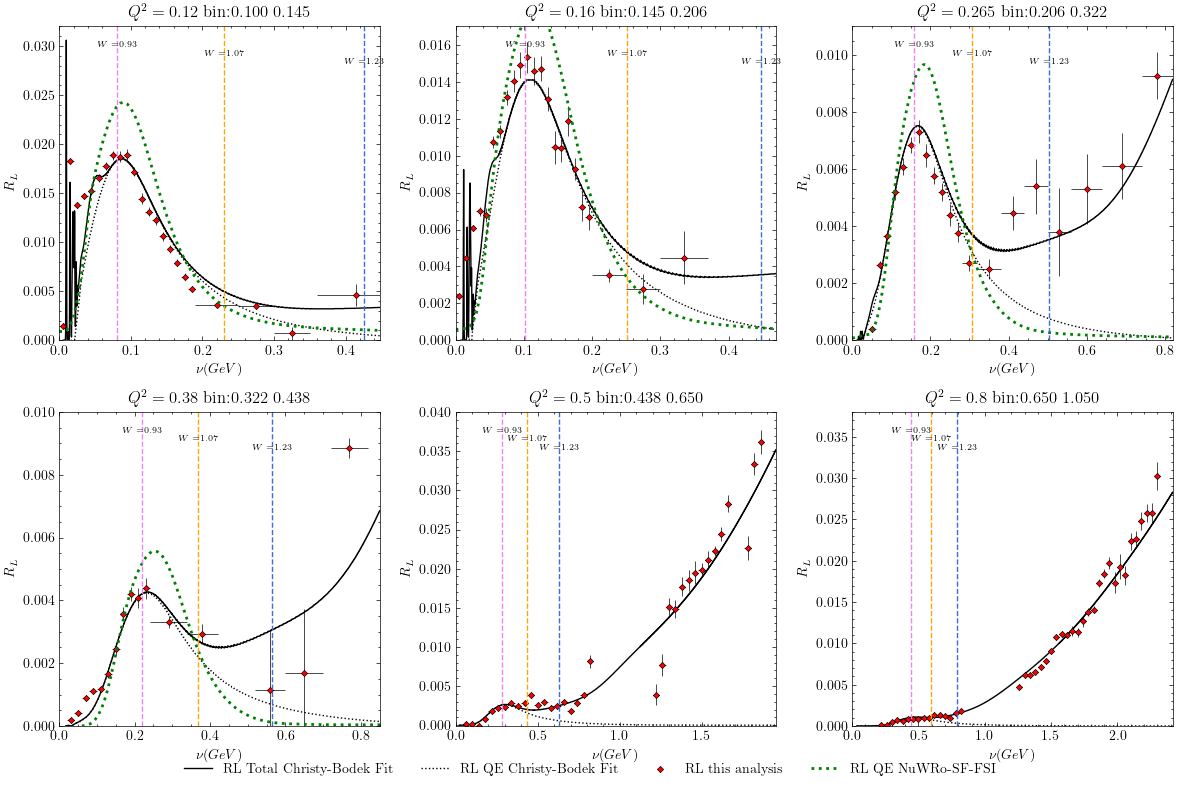

In [14]:
# 2x3 subplot grid to plot Q2 bin RL: bin 7 to 12
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

RL_total_Christy_Bodek = 0
RL_QE_Christy_Bodek = 0
RL_this_analysis = 0
RL_Yamaguchi = 0
# RL_Jourdan = 0
# RL_Barreau = 0
RL_NuWRo = 0
RL_Sheren = 0
RL_Goldemberg = 0

plot_heights = [0.032,0.017,0.011,0.01,0.04,0.038]

RL_theory = 0
with PdfPages('figures/RL_Q2_plots2.pdf') as pdf:
        
    for plot_index, ax in enumerate(axs.flat):
        plot_height = plot_heights[plot_index]
        i = plot_index + 6
        Q2center = Q2centers[i]
        qvcenter = qvcenters[i]
        # qvcenter_data = Qvcenter_datas[i]
        Q2center_data = Q2center_datas[i]
        # qv2center = qvcenter**2
        # qvbin_name = qvbin_names[i]
        Q2bin_name = Q2bin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        # bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        bin_data = df.loc[df['Q2center']==Q2center].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]
   
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]
        qv_grid = np.sqrt(Q2center+nu_grid**2)
        Ex_grid = nu_grid-Q2center/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2center

        # Q2_grid = qvcenter**2-nu_grid**2
        # Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        # W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid
        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            # Q2 = Q2_grid[j]
            nu = nu_grid[j]
            qv = qv_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_q2_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_q2_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_q2_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_q2_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                # RT = (2*b_opt*Q2/qv2center)/1000
                # RTerr = (2*b_err*Q2/qv2center)/1000
                RT = (2*b_opt*Q2center/(qv**2))/1000
                RTerr = (2*b_err*Q2center/(qv**2))/1000
                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                # RLs.append(RL)
                # RLerrs.append(RLerr)
                # RTs.append(RT)
                # RTerrs.append(RTerr)
                # RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                # RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                # RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                # nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            # responseq2_plotting = Q2center_data.loc[Q2center_data['nu']<=3.5]
            responseq2_plotting = Q2center_data
            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")
        if RL_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black',label="RL Total Christy-Bodek Fit", linestyle='solid')
            RL_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black', linestyle='solid')
        if RL_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black',label="RL QE Christy-Bodek Fit", linestyle='dotted') 
            RL_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black', linestyle='dotted')   
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
        
        # Yamaguchi
        Yam_RLmax = 0
        Yam_RTmax = 0
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            # nu_ex30 = -2*mass_C12 + 2*np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*0.03)
            nu_ex30 = 0.03 + Q2center/(2*mass_C12)
            Yam_data = Yam_data.loc[Yam_data['nu_RL']<=nu_ex30]
            if RL_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',label="RL Yamaguchi",**scatter_setting)
                RL_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',**scatter_setting)
            ax.plot(Yam_data['nu_RL'],Yam_data["RL"],lw=0.5,color='gray',zorder=-2)
            Yam_RLmax = Yam_data["RL"].max()
            Yam_RTmax = Yam_data["RT"].max()

        # # this analysis
        if len(Yam_data) > 0:
            fit = fit.loc[fit['nu']>=Yam_data['nu_RL'].max()]
        if RL_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RL'],color='red',label='RL this analysis',**our_scatter_setting)
            RL_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RL'],color='red',**our_scatter_setting)
        ax.errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], xerr = fit['xerr'], color='red', **errorbar_setting)
        ax.set_title(f"$Q^2={Q2center}$ bin:"+Q2bin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_L$")
        
        # no Jourdan, Barreau
        # no theory GFMC, RMF

        # NuWRo
        if Q2center in SF_FSI_q2s:
            df_SF = pd.read_csv(f'SF_FSI/Resp_FSI_12C_{Q2center}_Q2_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RL_NuWRo == 0:
                # ax.scatter(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',linestyle='dotted',linewidth=2)
                RL_NuWRo = 1
            else:
                # ax.scatter(df_SF['nu']/1000,df_SF['RL'],color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RL'],color='green',linestyle='dotted',linewidth=2)
        # photon-production data RT
        # if Q2center == 0.01:
        #     ax.scatter(Photon_plotting['nu'],Photon_plotting["RT"],marker='^',s=20,color='fuchsia',label="RT Photo-production ($Q^2=0$)")
        #     ax.plot(Photon_plotting['nu'],Photon_plotting["RT"],color='black',lw=1)

        # Sheren
        # Sheren = []
        # if Q2center in Sheren_q2s:
        #     Sheren = df_Sheren.loc[df_Sheren['Q2']==Q2center]
        #     if RL_Sheren == 0:
        #         ax.scatter(Sheren['nu'], Sheren['RL']*12,color='royalblue',label="RL Sheren",**scatter_setting)
        #         # axs[1].scatter(Sheren['nu'], Sheren['RT']*12,marker='D',s=6,color='royalblue',label="Sheren")
        #         RL_Sheren = 1
        #     else:
        #         ax.scatter(Sheren['nu'], Sheren['RL']*12, color='royalblue', **scatter_setting)
        #         # axs[1].scatter(Sheren['nu'], Sheren['RT']*12, color='royalblue', fmt ='.',capsize=3,markersize='3')

        #     ax.errorbar(Sheren['nu'], Sheren['RL']*12, yerr = Sheren['RLerr']*12, **errorbar_setting)
        #     # axs[1].errorbar(Sheren['nu'], Sheren['RT']*12, yerr = Sheren['RTerr']*12, color='royalblue', fmt ='.',capsize=3,markersize='3')

        # # Goldemberg RT
        # if qvcenter == 0.1: 
        #     Goldem_data = pd.read_csv('Goldemberger_180.csv')
        #     # ax.errorbar(Goldem_data['nu'],Goldem_data["RT"], yerr = Goldem_data["error"], color='skyblue', fmt ='.',capsize=3,markersize='3')
        #     # ax.scatter(Goldem_data['nu'],Goldem_data["RT"],marker='D',s=6,color='blue',label="RT Goldemberg "+'$\mathbf{q}$='+str(qvcenter))


        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        # W_colors = ['violet','forestgreen','royalblue']
        W_colors = ['violet','orange','royalblue']

        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3
        W_locations = 0.025 + (W_peaks**2+Q2center-mass_nucleon**2)/(2*mass_nucleon)

        # W peaks
        # 0.8649, 1.1449, 1.5129
        for k in range(len(W_peaks)):
            location = W_locations[k]
            ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
            if k == 0:
                ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
            elif k == 1:
                ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
            else:
                ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]), **text_setting)


        # no qvcenter vertical line                
        # ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        # ax.text(qvcenter*0.98, plot_height, '\n\n\n\n$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)


        # ax.set_xlim(0.0, qvcenter*1.05)

        # ax.set_xlim(0.0, qvcenter*1.05)
        if fit['nu'].max() < W_locations[2]:
            ax.set_xlim(0.0, W_locations[2]*1.05)
        else:
            ax.set_xlim(0.0, fit['nu'].max()*1.05)

        # if len(Sheren) > 0:
        #     ax.set_xlim(0.0, Sheren['nu'].max()*1.05)
        if Q2center == 0.38:
            ax.set_xlim(0.0, 0.85)
        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(axs0_y_low,plot_height)
        ax.set_ylim(axs0_y_low,plot_height)
        # ax.legend()

    plt.tight_layout()  # Optional, for better spacing between subplots
    plt.subplots_adjust(bottom=0.08)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/12356

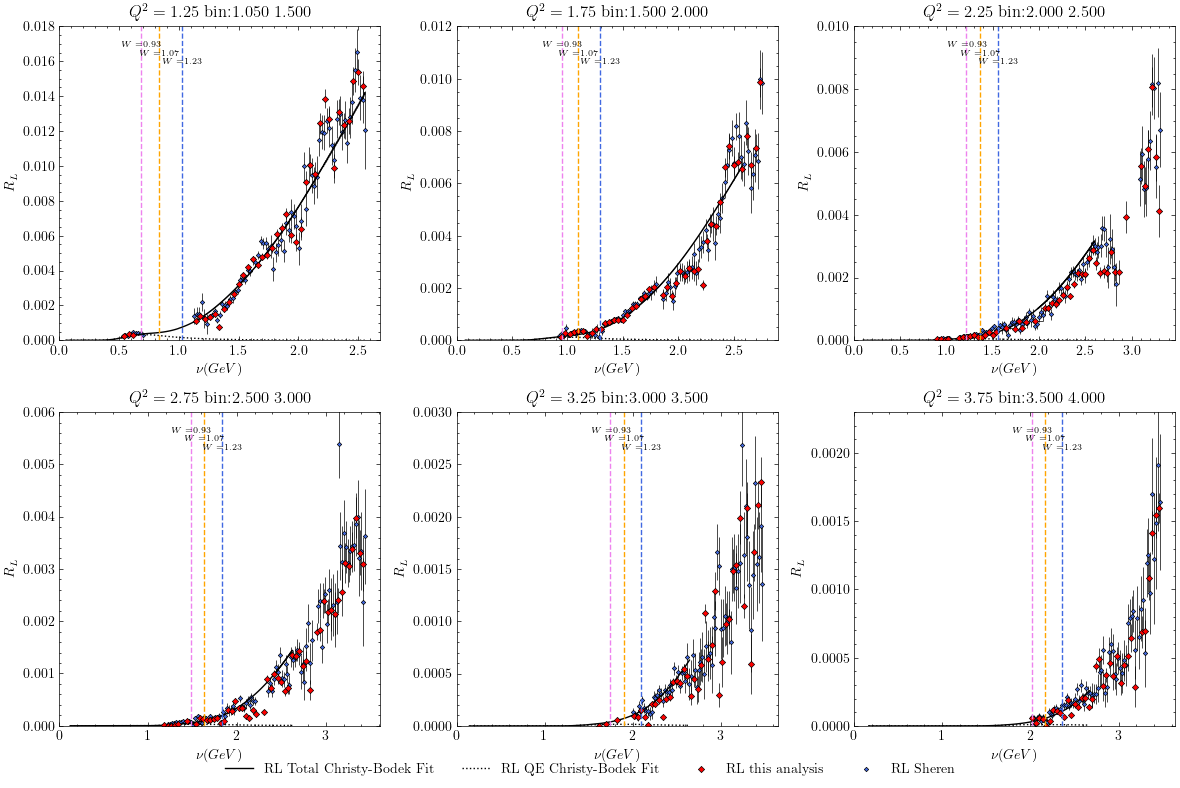

In [38]:
# 2x3 subplot grid to plot Q2 bin RL: bin 13 to 18
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

RL_total_Christy_Bodek = 0
RL_QE_Christy_Bodek = 0
RL_this_analysis = 0
RL_Yamaguchi = 0
# RL_Jourdan = 0
# RL_Barreau = 0
# RL_NuWRo = 0
RL_Sheren = 0
RL_Goldemberg = 0

plot_heights = [0.018,0.012,0.01,0.006,0.003,0.0023]

RL_theory = 0
with PdfPages('figures/RL_Q2_plots3.pdf') as pdf:
        
    for plot_index, ax in enumerate(axs.flat):
        plot_height = plot_heights[plot_index]
        i = plot_index + 12
        Q2center = Q2centers[i]
        qvcenter = qvcenters[i]
        # qvcenter_data = Qvcenter_datas[i]
        Q2center_data = Q2center_datas[i]
        # qv2center = qvcenter**2
        # qvbin_name = qvbin_names[i]
        Q2bin_name = Q2bin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        # bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        bin_data = df.loc[df['Q2center']==Q2center].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]
   
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]
        qv_grid = np.sqrt(Q2center+nu_grid**2)
        Ex_grid = nu_grid-Q2center/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2center

        # Q2_grid = qvcenter**2-nu_grid**2
        # Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        # W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid
        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            # Q2 = Q2_grid[j]
            nu = nu_grid[j]
            qv = qv_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_q2_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_q2_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_q2_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_q2_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                # RT = (2*b_opt*Q2/qv2center)/1000
                # RTerr = (2*b_err*Q2/qv2center)/1000
                RT = (2*b_opt*Q2center/(qv**2))/1000
                RTerr = (2*b_err*Q2center/(qv**2))/1000
                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                # RLs.append(RL)
                # RLerrs.append(RLerr)
                # RTs.append(RT)
                # RTerrs.append(RTerr)
                # RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                # RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                # RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                # nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            # responseq2_plotting = Q2center_data.loc[Q2center_data['nu']<=fit['nu'].max()*1.1]
            responseq2_plotting = Q2center_data

            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")
        if RL_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black',label="RL Total Christy-Bodek Fit", linestyle='solid')
            RL_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black', linestyle='solid')
        if RL_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black',label="RL QE Christy-Bodek Fit", linestyle='dotted') 
            RL_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black', linestyle='dotted')   
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
        
        # Yamaguchi
        Yam_RLmax = 0
        Yam_RTmax = 0
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            if RL_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',label="RL Yamaguchi",**scatter_setting)
                RL_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',**scatter_setting)
            ax.plot(Yam_data['nu_RL'],Yam_data["RL"],lw=0.5,color='gray',zorder=-2)
            Yam_RLmax = Yam_data["RL"].max()
            Yam_RTmax = Yam_data["RT"].max()

        

        # this analysis
        if len(Yam_data) > 0:
            fit = fit.loc[fit['nu']>=Yam_data['nu_RL'].max()*0.9]
        if RL_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RL'],color='red',label='RL this analysis',**our_scatter_setting)
            RL_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RL'],color='red',**our_scatter_setting)
        ax.errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], xerr = fit['xerr'], color='red', **errorbar_setting)
        ax.set_title(f"$Q^2={Q2center}$ bin:"+Q2bin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_L$")
        
        # no Jourdan, Barreau
        # no theory GFMC, RMF
        
        # NuWRo
        if Q2center in SF_FSI_q2s:
            df_SF = pd.read_csv(f'SF_FSI/Resp_FSI_12C_{Q2center}_Q2_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RL_NuWRo == 0:
                ax.scatter(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',s=5)
                RL_NuWRo = 1
            else:
                ax.scatter(df_SF['nu']/1000,df_SF['RL'],color='green',s=5)

        # photon-production data RT
        # if Q2center == 0.01:
        #     ax.scatter(Photon_plotting['nu'],Photon_plotting["RT"],marker='^',s=20,color='fuchsia',label="RT Photo-production ($Q^2=0$)")
        #     ax.plot(Photon_plotting['nu'],Photon_plotting["RT"],color='black',lw=1)

        # Sheren
        if Q2center in Sheren_q2s:
            Sheren = df_Sheren.loc[df_Sheren['Q2']==Q2center]
            if RL_Sheren == 0:
                ax.scatter(Sheren['nu'], Sheren['RL']*12,color='royalblue',label="RL Sheren",**scatter_setting)
                # axs[1].scatter(Sheren['nu'], Sheren['RT']*12,marker='D',s=6,color='royalblue',label="Sheren")
                RL_Sheren = 1
            else:
                ax.scatter(Sheren['nu'], Sheren['RL']*12, color='royalblue', **scatter_setting)
                # axs[1].scatter(Sheren['nu'], Sheren['RT']*12, color='royalblue', fmt ='.',capsize=3,markersize='3')

            ax.errorbar(Sheren['nu'], Sheren['RL']*12, yerr = Sheren['RLerr']*12, **errorbar_setting)
            # axs[1].errorbar(Sheren['nu'], Sheren['RT']*12, yerr = Sheren['RTerr']*12, color='royalblue', fmt ='.',capsize=3,markersize='3')

        # Goldemberg RT
        if qvcenter == 0.1: 
            Goldem_data = pd.read_csv('Goldemberger_180.csv')
            # ax.errorbar(Goldem_data['nu'],Goldem_data["RT"], yerr = Goldem_data["error"], color='skyblue', fmt ='.',capsize=3,markersize='3')
            # ax.scatter(Goldem_data['nu'],Goldem_data["RT"],marker='D',s=6,color='blue',label="RT Goldemberg "+'$\mathbf{q}$='+str(qvcenter))


        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        # W_colors = ['violet','forestgreen','royalblue']
        W_colors = ['violet','orange','royalblue']

        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3

        # W peaks
        # 0.8649, 1.1449, 1.5129
        for k in range(len(W_peaks)):
            # location = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks[k]**2)
            location = 0.025 + (W_peaks[k]**2+Q2center-mass_nucleon**2)/(2*mass_nucleon)
            # location = 0.025 + (W_peaks[k]**2+Q2center-mass_nucleon**2)/(2*mass_nucleon)
            if location < fit['nu'].max():
                ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
                if k == 0:
                    ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
                elif k == 1:
                    ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
                else:
                    ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]), **text_setting)


        # no qvcenter vertical line                
        # ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        # ax.text(qvcenter*0.98, plot_height, '\n\n\n\n$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)


        # ax.set_xlim(0.0, qvcenter*1.05)
        ax.set_xlim(0.0, fit['nu'].max()*1.05)
        if len(Sheren) > 0:
            ax.set_xlim(0.0, Sheren['nu'].max()*1.05)
            
        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(axs0_y_low,plot_height)

        ax.set_ylim(axs0_y_low,plot_height)
        # ax.legend()

    plt.tight_layout()  # Optional, for better spacing between subplots
    plt.subplots_adjust(bottom=0.08)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)


In [39]:
merger = PdfMerger() # merge RL Q2 plots
for i in [1,2,3]:
    merger.append('figures/RL_Q2_plots'+str(i)+'.pdf')
# merger.write("RLRT_Q2bins.pdf")
merger.write('figures/RL_Q2.pdf')
merger.close()


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/3693813657.py:1: DeprecationWarning: PdfMerger is deprecated and will be removed in pypdf 5.0.0. Use PdfWriter instead.
  merger = PdfMerger() # merge RL Q2 plots


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/12356

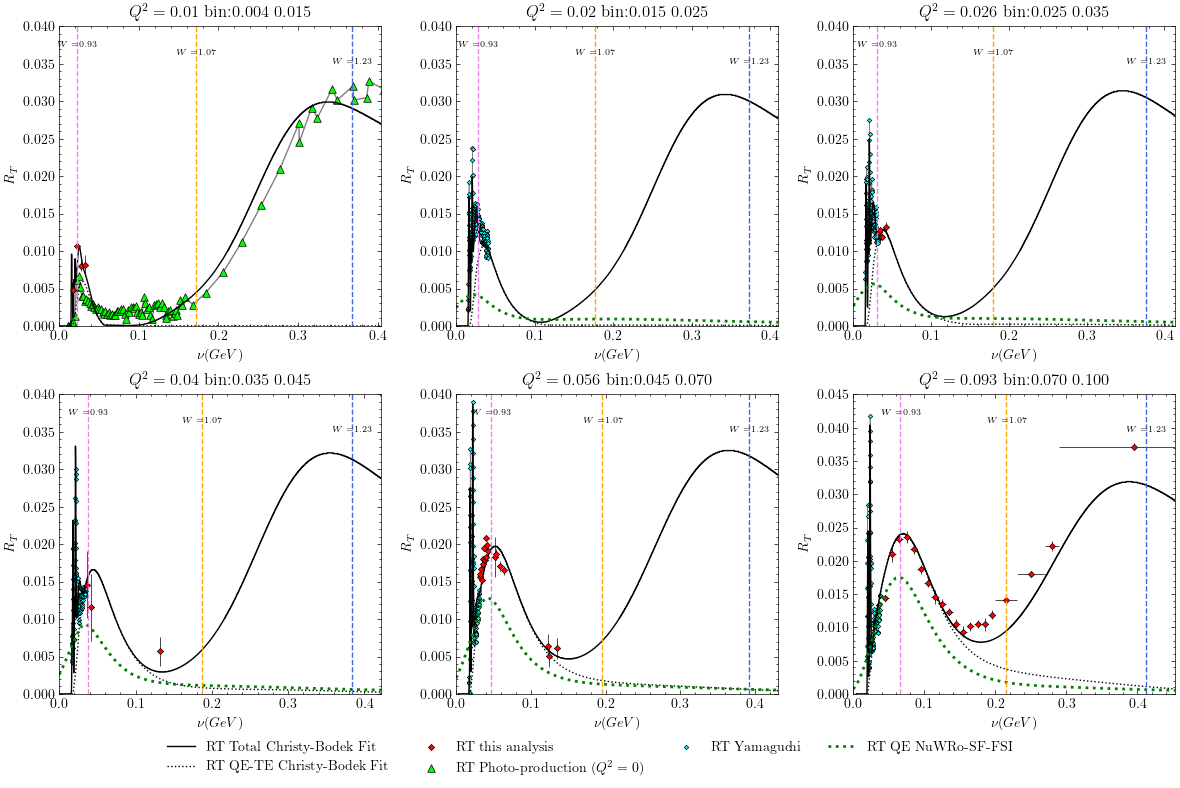

In [15]:
# 2x3 subplot grid to plot Q2 bin RT: bin 1 to 6
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

RT_total_Christy_Bodek = 0
RT_QE_Christy_Bodek = 0
RT_this_analysis = 0
RT_Yamaguchi = 0
RT_Sheren = 0
RT_Goldemberg = 0
RT_NuWRo = 0

plot_heights = [0.04,0.04,0.04,0.04,0.04,0.045]

RT_theory = 0
with PdfPages('figures/RT_Q2_plots1.pdf') as pdf:
        
    for i, ax in enumerate(axs.flat):
        plot_height = plot_heights[i]
        Q2center = Q2centers[i]
        qvcenter = qvcenters[i]
        # qvcenter_data = Qvcenter_datas[i]
        Q2center_data = Q2center_datas[i]
        # qv2center = qvcenter**2
        # qvbin_name = qvbin_names[i]
        Q2bin_name = Q2bin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        # bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        bin_data = df.loc[df['Q2center']==Q2center].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]
   
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]
        qv_grid = np.sqrt(Q2center+nu_grid**2)
        Ex_grid = nu_grid-Q2center/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2center

        # Q2_grid = qvcenter**2-nu_grid**2
        # Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        # W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid
        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            # Q2 = Q2_grid[j]
            nu = nu_grid[j]
            qv = qv_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_q2_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_q2_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_q2_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_q2_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                # RT = (2*b_opt*Q2/qv2center)/1000
                # RTerr = (2*b_err*Q2/qv2center)/1000
                RT = (2*b_opt*Q2center/(qv**2))/1000
                RTerr = (2*b_err*Q2center/(qv**2))/1000
                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                # RLs.append(RL)
                # RLerrs.append(RLerr)
                # RTs.append(RT)
                # RTerrs.append(RTerr)
                # RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                # RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                # RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                # nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            # responseq2_plotting = Q2center_data.loc[Q2center_data['nu']<=3.5]
            responseq2_plotting = Q2center_data
            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")
        if RT_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black',label="RT Total Christy-Bodek Fit", linestyle='solid')
            RT_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black', linestyle='solid')
        if RT_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"]+responseq2_plotting["RTE"],color='black',label="RT QE-TE Christy-Bodek Fit", linestyle='dotted') 
            RT_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"]+responseq2_plotting["RTE"],color='black', linestyle='dotted')   
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
        
        # # Yamaguchi
        Yam_RLmax = 0
        Yam_RTmax = 0
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            nu_ex30 = 0.03 + Q2center/(2*mass_C12)
            Yam_data = Yam_data.loc[Yam_data['nu_RL']<=nu_ex30]
            if RT_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',label="RT Yamaguchi",**scatter_setting)
                RT_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',**scatter_setting)
            ax.plot(Yam_data['nu_RT'],Yam_data["RT"],lw=0.5,color='gray',zorder=-2)
            Yam_RLmax = Yam_data["RL"].max()
            Yam_RTmax = Yam_data["RT"].max()

        # # this analysis
        if len(Yam_data) > 0:
            fit = fit.loc[fit['nu']>=Yam_data['nu_RT'].max()]
        if RT_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RT'],color='red',label='RT this analysis',**our_scatter_setting)
            RT_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RT'],color='red',**our_scatter_setting)
        ax.errorbar(fit['nu'], fit['RT'], yerr = fit['RTerr'], xerr = fit['xerr'], color='red', **errorbar_setting)
        ax.set_title(f"$Q^2={Q2center}$ bin:"+Q2bin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_T$")
        
        # no Jourdan, Barreau
        # no theory GFMC, RMF

        # NuWRo
        if Q2center in SF_FSI_q2s:
            df_SF = pd.read_csv(f'SF_FSI/Resp_FSI_12C_{Q2center}_Q2_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RT_NuWRo == 0:
                # ax.scatter(df_SF['nu']/1000,df_SF['RT'],label='RT QE NuWRo-SF-FSI',color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RT'],label='RT QE NuWRo-SF-FSI',color='green',linestyle='dotted',linewidth=2)
                RT_NuWRo = 1
            else:
                # ax.scatter(df_SF['nu']/1000,df_SF['RT'],color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RT'],color='green',linestyle='dotted',linewidth=2)

        # photon-production data RT
        if Q2center == 0.01:
            # ax.scatter(Photon_plotting['nu'],Photon_plotting["RT"],marker='^',s=30,color='lime',
            #            label="RT Photo-production ($Q^2=0$)",edgecolors='black',linewidth=0.5,zorder=1)
            ax.plot(Photon_plotting['nu'],Photon_plotting["RT"],color='gray',lw=1, zorder=-2)
            ax.scatter(Photon_plotting['nu'],Photon_plotting["RT"],label="RT Photo-production ($Q^2=0$)",**photo_scatter_setting)
            
        # # Sheren
        # if Q2center in Sheren_q2s:
        #     Sheren = df_Sheren.loc[df_Sheren['Q2']==Q2center]
        #     if RT_Sheren == 0:
        #         ax.scatter(Sheren['nu'], Sheren['RT']*12,color='royalblue',label="RT Sheren",**scatter_setting)
        #         # axs[1].scatter(Sheren['nu'], Sheren['RT']*12,marker='D',s=6,color='royalblue',label="Sheren")
        #         RT_Sheren = 1
        #     else:
        #         ax.scatter(Sheren['nu'], Sheren['RT']*12, color='royalblue', **scatter_setting)
        #         # axs[1].scatter(Sheren['nu'], Sheren['RT']*12, color='royalblue', fmt ='.',capsize=3,markersize='3')

        #     ax.errorbar(Sheren['nu'], Sheren['RT']*12, yerr = Sheren['RTerr']*12, **errorbar_setting)
        #     # axs[1].errorbar(Sheren['nu'], Sheren['RT']*12, yerr = Sheren['RTerr']*12, color='royalblue', fmt ='.',capsize=3,markersize='3')

        # # Goldemberg RT
        # if qvcenter == 0.1: 
        #     Goldem_data = pd.read_csv('Goldemberger_180.csv')
        #     ax.errorbar(Goldem_data['nu'],Goldem_data["RT"], yerr = Goldem_data["error"], **errorbar_setting)
        #     ax.scatter(Goldem_data['nu'],Goldem_data["RT"],color='gold',label="RT Goldemberg "+'$\mathbf{q}$='+str(qvcenter),**scatter_setting)

        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        # W_colors = ['violet','forestgreen','royalblue']
        W_colors = ['violet','orange','royalblue']

        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3

        # W peaks
        # 0.8649, 1.1449, 1.5129
        W_locations = 0.025 + (W_peaks**2+Q2center-mass_nucleon**2)/(2*mass_nucleon)
        for k in range(len(W_peaks)):
            location = W_locations[k]
            # if location < fit['nu'].max():
            ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
            if k == 0:
                ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
            elif k == 1:
                ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
            else:
                ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]), **text_setting)

        # no qvcenter vertical line                
        # ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        # ax.text(qvcenter*0.98, plot_height, '\n\n\n\n$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)

        # ax.set_xlim(0.0, qvcenter*1.05)
        if fit['nu'].max() > W_locations[2]:
            ax.set_xlim(0.0, fit['nu'].max()*1.05)
        else:
            ax.set_xlim(0.0, W_locations[2]*1.1)
    
        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(axs0_y_low,plot_height)
        ax.set_ylim(axs1_y_low,plot_height)
        # ax.legend()

    plt.tight_layout()  # Optional, for better spacing between subplots
    plt.subplots_adjust(bottom=0.12)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/12356

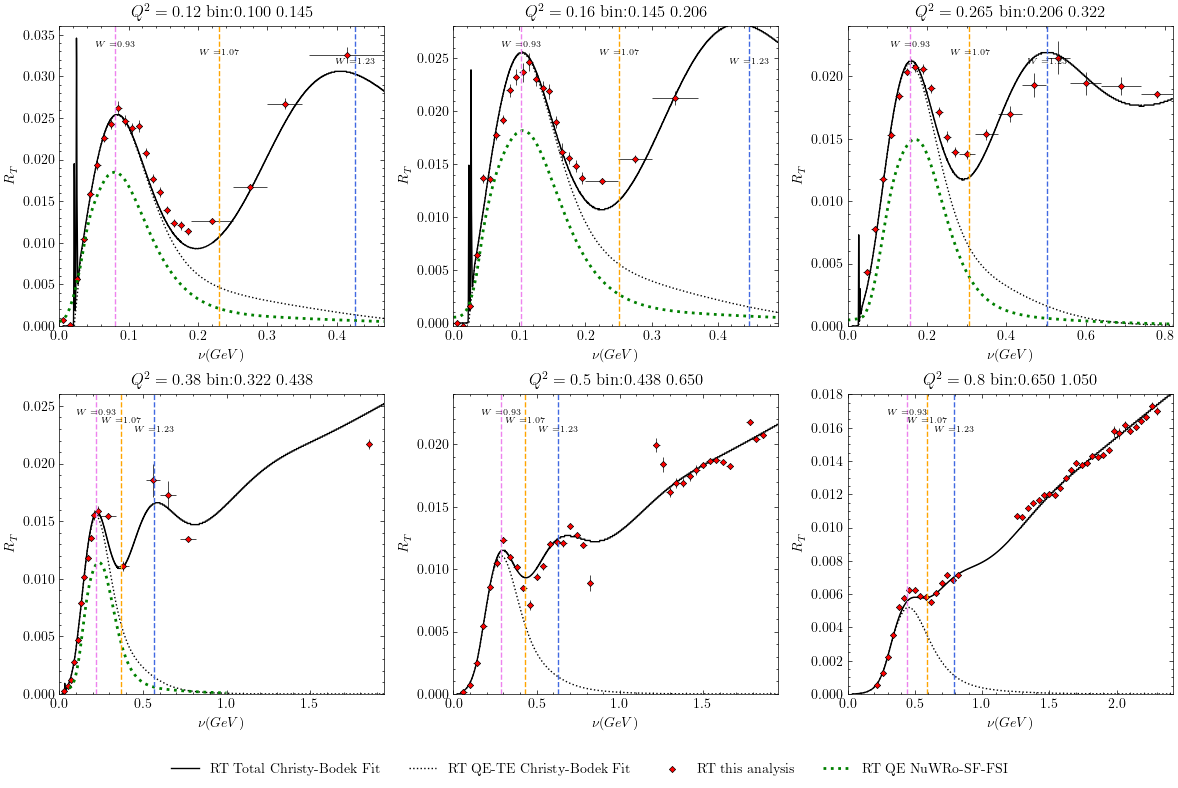

In [16]:
# 2x3 subplot grid to plot Q2 bin RT: bin 7 to 12
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

RT_total_Christy_Bodek = 0
RT_QE_Christy_Bodek = 0
RT_this_analysis = 0
RT_Yamaguchi = 0
RT_Sheren = 0
RT_Goldemberg = 0
RT_NuWRo = 0

plot_heights = [0.036,0.028,0.024,0.026,0.024,0.018]

RT_theory = 0
with PdfPages('figures/RT_Q2_plots2.pdf') as pdf:
        
    for plot_index, ax in enumerate(axs.flat):
        plot_height = plot_heights[plot_index]
        i = plot_index + 6
        Q2center = Q2centers[i]
        qvcenter = qvcenters[i]
        # qvcenter_data = Qvcenter_datas[i]
        Q2center_data = Q2center_datas[i]
        # qv2center = qvcenter**2
        # qvbin_name = qvbin_names[i]
        Q2bin_name = Q2bin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        # bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        bin_data = df.loc[df['Q2center']==Q2center].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]
   
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]
        qv_grid = np.sqrt(Q2center+nu_grid**2)
        Ex_grid = nu_grid-Q2center/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2center

        # Q2_grid = qvcenter**2-nu_grid**2
        # Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        # W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid
        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            # Q2 = Q2_grid[j]
            nu = nu_grid[j]
            qv = qv_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_q2_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_q2_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_q2_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_q2_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                # RT = (2*b_opt*Q2/qv2center)/1000
                # RTerr = (2*b_err*Q2/qv2center)/1000
                RT = (2*b_opt*Q2center/(qv**2))/1000
                RTerr = (2*b_err*Q2center/(qv**2))/1000
                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                # RLs.append(RL)
                # RLerrs.append(RLerr)
                # RTs.append(RT)
                # RTerrs.append(RTerr)
                # RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                # RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                # RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                # nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            # responseq2_plotting = Q2center_data.loc[Q2center_data['nu']<=3.5]
            responseq2_plotting = Q2center_data
            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")
        if RT_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black',label="RT Total Christy-Bodek Fit", linestyle='solid')
            RT_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black', linestyle='solid')
        if RT_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"]+responseq2_plotting["RTE"],color='black',label="RT QE-TE Christy-Bodek Fit", linestyle='dotted') 
            RT_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"]+responseq2_plotting["RTE"],color='black', linestyle='dotted')   
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
        
        # # Yamaguchi
        Yam_RLmax = 0
        Yam_RTmax = 0
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            nu_ex30 = 0.03 + Q2center/(2*mass_C12)
            Yam_data = Yam_data.loc[Yam_data['nu_RL']<=nu_ex30]
            if RT_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',label="RT Yamaguchi",**scatter_setting)
                RT_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',**scatter_setting)
            ax.plot(Yam_data['nu_RT'],Yam_data["RT"],lw=0.5,color='gray',zorder=-2)
            Yam_RLmax = Yam_data["RL"].max()
            Yam_RTmax = Yam_data["RT"].max()

        # # this analysis
        if len(Yam_data) > 0:
            fit = fit.loc[fit['nu']>=Yam_data['nu_RT'].max()]
        if RT_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RT'],color='red',label='RT this analysis',**our_scatter_setting)
            RT_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RT'],color='red',**our_scatter_setting)
        ax.errorbar(fit['nu'], fit['RT'], yerr = fit['RTerr'], xerr = fit['xerr'], color='red', **errorbar_setting)
        ax.set_title(f"$Q^2={Q2center}$ bin:"+Q2bin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_T$")
        
        # no Jourdan, Barreau
        # no theory GFMC, RMF
        # NuWRo
        if Q2center in SF_FSI_q2s:
            df_SF = pd.read_csv(f'SF_FSI/Resp_FSI_12C_{Q2center}_Q2_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RT_NuWRo == 0:
                # ax.scatter(df_SF['nu']/1000,df_SF['RT'],label='RT QE NuWRo-SF-FSI',color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RT'],label='RT QE NuWRo-SF-FSI',color='green',linestyle='dotted',linewidth=2)
                RT_NuWRo = 1
            else:
                # ax.scatter(df_SF['nu']/1000,df_SF['RT'],color='green',s=5)
                ax.plot(df_SF['nu']/1000,df_SF['RT'],color='green',linestyle='dotted',linewidth=2)


        # photon-production data RT
        if Q2center == 0.01:
            ax.scatter(Photon_plotting['nu'],Photon_plotting["RT"],marker='^',s=20,color='lime',label="RT Photo-production ($Q^2=0$)")
            ax.plot(Photon_plotting['nu'],Photon_plotting["RT"],color='black',lw=1)

        # # Sheren
        # if Q2center in Sheren_q2s:
        #     Sheren = df_Sheren.loc[df_Sheren['Q2']==Q2center]
        #     if RT_Sheren == 0:
        #         ax.scatter(Sheren['nu'], Sheren['RT']*12,color='royalblue',label="RT Sheren",**scatter_setting)
        #         # axs[1].scatter(Sheren['nu'], Sheren['RT']*12,marker='D',s=6,color='royalblue',label="Sheren")
        #         RT_Sheren = 1
        #     else:
        #         ax.scatter(Sheren['nu'], Sheren['RT']*12, color='royalblue', **scatter_setting)
        #         # axs[1].scatter(Sheren['nu'], Sheren['RT']*12, color='royalblue', fmt ='.',capsize=3,markersize='3')

        #     ax.errorbar(Sheren['nu'], Sheren['RT']*12, yerr = Sheren['RTerr']*12, **errorbar_setting)
        #     # axs[1].errorbar(Sheren['nu'], Sheren['RT']*12, yerr = Sheren['RTerr']*12, color='royalblue', fmt ='.',capsize=3,markersize='3')

        # # Goldemberg RT
        # if qvcenter == 0.1: 
        #     Goldem_data = pd.read_csv('Goldemberger_180.csv')
        #     ax.errorbar(Goldem_data['nu'],Goldem_data["RT"], yerr = Goldem_data["error"], **errorbar_setting)
        #     ax.scatter(Goldem_data['nu'],Goldem_data["RT"],color='gold',label="RT Goldemberg "+'$\mathbf{q}$='+str(qvcenter),**scatter_setting)

        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        # W_colors = ['violet','forestgreen','royalblue']
        W_colors = ['violet','orange','royalblue']

        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3
        W_locations = 0.025 + (W_peaks**2+Q2center-mass_nucleon**2)/(2*mass_nucleon)
        # W peaks
        # 0.8649, 1.1449, 1.5129
        for k in range(len(W_peaks)):
            location = W_locations[k]
            # if location < fit['nu'].max():
            ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
            if k == 0:
                ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
            elif k == 1:
                ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
            else:
                ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]), **text_setting)

        # no qvcenter vertical line                
        # ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        # ax.text(qvcenter*0.98, plot_height, '\n\n\n\n$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)

        # ax.set_xlim(0.0, qvcenter*1.05)
        if fit['nu'].max() > W_locations[2]:
            ax.set_xlim(0.0, fit['nu'].max()*1.05)
        else:
            ax.set_xlim(0.0, W_locations[2]*1.1)
    
        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(axs0_y_low,plot_height)
        ax.set_ylim(axs1_y_low,plot_height)
        # ax.legend()

    plt.tight_layout()  # Optional, for better spacing between subplots
    plt.subplots_adjust(bottom=0.12)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/12356

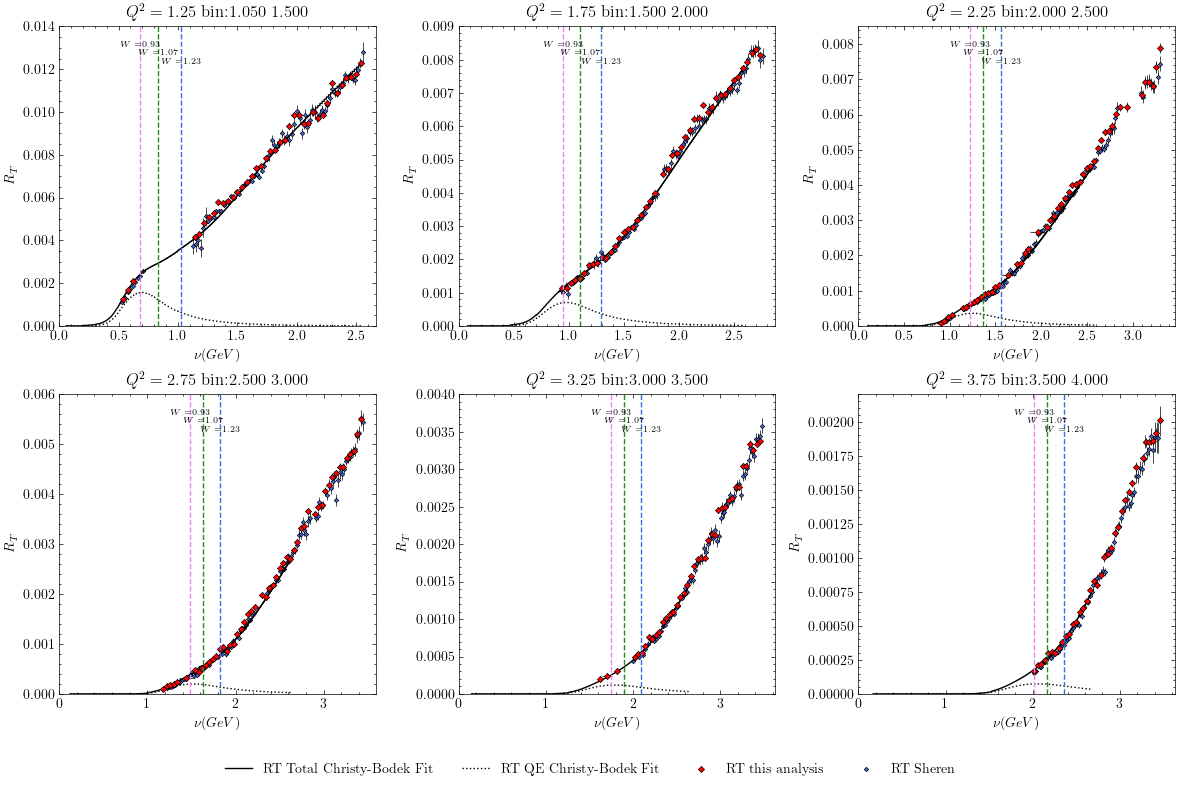

In [42]:
# 2x3 subplot grid to plot Q2 bin RT: bin 13 to 18
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

RT_total_Christy_Bodek = 0
RT_QE_Christy_Bodek = 0
RT_this_analysis = 0
RT_Yamaguchi = 0
RT_Sheren = 0
RT_Goldemberg = 0
RT_NuWRo = 0

plot_heights = [0.014,0.009,0.0085,0.006,0.004,0.0022]

RT_theory = 0
with PdfPages('figures/RT_Q2_plots3.pdf') as pdf:
        
    for plot_index, ax in enumerate(axs.flat):
        plot_height = plot_heights[plot_index]
        i = plot_index + 12
        Q2center = Q2centers[i]
        qvcenter = qvcenters[i]
        # qvcenter_data = Qvcenter_datas[i]
        Q2center_data = Q2center_datas[i]
        # qv2center = qvcenter**2
        # qvbin_name = qvbin_names[i]
        Q2bin_name = Q2bin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        # bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        bin_data = df.loc[df['Q2center']==Q2center].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]
   
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]
        qv_grid = np.sqrt(Q2center+nu_grid**2)
        Ex_grid = nu_grid-Q2center/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2center

        # Q2_grid = qvcenter**2-nu_grid**2
        # Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        # W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid
        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            # Q2 = Q2_grid[j]
            nu = nu_grid[j]
            qv = qv_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_q2_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_q2_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_q2_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_q2_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                # RT = (2*b_opt*Q2/qv2center)/1000
                # RTerr = (2*b_err*Q2/qv2center)/1000
                RT = (2*b_opt*Q2center/(qv**2))/1000
                RTerr = (2*b_err*Q2center/(qv**2))/1000
                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                # RLs.append(RL)
                # RLerrs.append(RLerr)
                # RTs.append(RT)
                # RTerrs.append(RTerr)
                # RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                # RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                # RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                # nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            # responseq2_plotting = Q2center_data.loc[Q2center_data['nu']<=3.5]
            responseq2_plotting = Q2center_data

            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")
        if RT_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black',label="RT Total Christy-Bodek Fit", linestyle='solid')
            RT_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black', linestyle='solid')
        if RT_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"],color='black',label="RT QE Christy-Bodek Fit", linestyle='dotted') 
            RT_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"],color='black', linestyle='dotted')   
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
        
        # Yamaguchi
        Yam_RLmax = 0
        Yam_RTmax = 0
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            if RT_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',label="RT Yamaguchi",**scatter_setting)
                RT_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',**scatter_setting)
            ax.plot(Yam_data['nu_RT'],Yam_data["RT"],lw=0.5,color='gray',zorder=-2)
            Yam_RLmax = Yam_data["RL"].max()
            Yam_RTmax = Yam_data["RT"].max()

        # this analysis
        if len(Yam_data) > 0:
            fit = fit.loc[fit['nu']>=Yam_data['nu_RT'].max()*0.9]
        if RT_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RT'],color='red',label='RT this analysis',**our_scatter_setting)
            RT_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RT'],color='red',**our_scatter_setting)
        ax.errorbar(fit['nu'], fit['RT'], yerr = fit['RTerr'], xerr = fit['xerr'], color='red', **errorbar_setting)
        ax.set_title(f"$Q^2={Q2center}$ bin:"+Q2bin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_T$")
        
        # no Jourdan, Barreau
        # no theory GFMC, RMF
        # NuWRo
        if Q2center in SF_FSI_q2s:
            df_SF = pd.read_csv(f'SF_FSI/Resp_FSI_12C_{Q2center}_Q2_SF.txt',delim_whitespace=True,header=None)
            df_SF.columns = ['nu','RL','RT']
            if RL_NuWRo == 0:
                ax.scatter(df_SF['nu']/1000,df_SF['RT'],label='RT QE NuWRo-SF-FSI',color='green',s=5)
                RL_NuWRo = 1
            else:
                ax.scatter(df_SF['nu']/1000,df_SF['RT'],color='green',s=5)


        # photon-production data RT
        if Q2center == 0.01:
            ax.scatter(Photon_plotting['nu'],Photon_plotting["RT"],marker='^',s=20,color='lime',label="RT Photo-production ($Q^2=0$)")
            ax.plot(Photon_plotting['nu'],Photon_plotting["RT"],color='black',lw=1)

        # Sheren
        if Q2center in Sheren_q2s:
            Sheren = df_Sheren.loc[df_Sheren['Q2']==Q2center]
            if RT_Sheren == 0:
                ax.scatter(Sheren['nu'], Sheren['RT']*12,color='royalblue',label="RT Sheren",**scatter_setting)
                # axs[1].scatter(Sheren['nu'], Sheren['RT']*12,marker='D',s=6,color='royalblue',label="Sheren")
                RT_Sheren = 1
            else:
                ax.scatter(Sheren['nu'], Sheren['RT']*12, color='royalblue', **scatter_setting)
                # axs[1].scatter(Sheren['nu'], Sheren['RT']*12, color='royalblue', fmt ='.',capsize=3,markersize='3')

            ax.errorbar(Sheren['nu'], Sheren['RT']*12, yerr = Sheren['RTerr']*12, **errorbar_setting)
            # axs[1].errorbar(Sheren['nu'], Sheren['RT']*12, yerr = Sheren['RTerr']*12, color='royalblue', fmt ='.',capsize=3,markersize='3')

        # Goldemberg RT
        if qvcenter == 0.1: 
            Goldem_data = pd.read_csv('Goldemberger_180.csv')
            ax.errorbar(Goldem_data['nu'],Goldem_data["RT"], yerr = Goldem_data["error"], **errorbar_setting)
            ax.scatter(Goldem_data['nu'],Goldem_data["RT"],color='gold',label="RT Goldemberg "+'$\mathbf{q}$='+str(qvcenter),**scatter_setting)

        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        W_colors = ['violet','forestgreen','royalblue']
        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3

        # W peaks
        # 0.8649, 1.1449, 1.5129
        for k in range(len(W_peaks)):
            # location = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks[k]**2)
            location = 0.025 + (W_peaks[k]**2+Q2center-mass_nucleon**2)/(2*mass_nucleon)
            # location = 0.025 + (W_peaks[k]**2+Q2center-mass_nucleon**2)/(2*mass_nucleon)
            if location < fit['nu'].max():
                ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
                if k == 0:
                    ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
                elif k == 1:
                    ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
                else:
                    ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]), **text_setting)

        # no qvcenter vertical line                
        # ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        # ax.text(qvcenter*0.98, plot_height, '\n\n\n\n$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)

        # ax.set_xlim(0.0, qvcenter*1.05)
        ax.set_xlim(0.0, fit['nu'].max()*1.05)
    
        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(axs0_y_low,plot_height)
        ax.set_ylim(axs1_y_low,plot_height)
        # ax.legend()

    plt.tight_layout()  # Optional, for better spacing between subplots
    plt.subplots_adjust(bottom=0.12)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)


In [43]:
merger = PdfMerger() # merge RT Q2 plots
for i in [1,2,3]:
    merger.append('figures/RT_Q2_plots'+str(i)+'.pdf')
# merger.write("RLRT_Q2bins.pdf")
merger.write('figures/RT_Q2.pdf')
merger.close()


/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/3632640753.py:1: DeprecationWarning: PdfMerger is deprecated and will be removed in pypdf 5.0.0. Use PdfWriter instead.
  merger = PdfMerger() # merge RT Q2 plots


In [102]:
merger = PdfMerger() # merge everything
merger.append('figures/RL_qv.pdf')
merger.append('figures/RT_qv.pdf')
merger.append('figures/RL_Q2.pdf')
merger.append('figures/RT_Q2.pdf')
merger.write('figures/RLRT_everything.pdf')
merger.close()

/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_91575/2890038184.py:1: DeprecationWarning: PdfMerger is deprecated and will be removed in pypdf 5.0.0. Use PdfWriter instead.
  merger = PdfMerger() # merge everything


In [24]:
merger = PdfMerger() # merge first 12 plots of qv, Q2 RL RT comparing to MC only
merger.append('figures/RL_journal_plots1.pdf')
merger.append('figures/RL_journal_plots2.pdf')
merger.append('figures/RT_journal_plots1.pdf')
merger.append('figures/RT_journal_plots2.pdf')
merger.append('figures/RL_Q2_plots1.pdf')
merger.append('figures/RL_Q2_plots2.pdf')
merger.append('figures/RT_Q2_plots1.pdf')
merger.append('figures/RT_Q2_plots2.pdf')
merger.write('figures/RLRT_MConly_12bins.pdf')
merger.close()

/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_50578/2407271431.py:1: DeprecationWarning: PdfMerger is deprecated and will be removed in pypdf 5.0.0. Use PdfWriter instead.
  merger = PdfMerger() # merge first 12 plots of qv, Q2 RL RT comparing to MC only


In [6]:
# Feb 25: plots settings
# figsize = ((4*1.25), (3*1.25)*3)
# inspect_columns = [0]
errorbar_setting = {'markersize':'0','capsize':0,'lw':0.5,'fmt':'D','ecolor':'black','elinewidth':0.5,'zorder':-1}
our_scatter_setting = {'s':10,'marker':'D','edgecolors':'black','linewidth':0.5,'zorder':2}
text_setting = {'color':'black', 'ha':'center','va':'top','size':6}
scatter_setting = {'s':5,'marker':'D','edgecolors':'black','linewidth':0.5,'zorder':1}
photo_scatter_setting = {'s':60,'color':'lime','marker':'^','edgecolors':'black','linewidth':0.5,'zorder':1}

nuwidths = [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.005, 0.005, 0.005, 
            0.005,     0.005,   0.005,   0.005,   0.005,  0.005,  0.005, 0.005, 
            0.04, 0.04, 0.04, 0.04]

def photon_locator(Photon_plotting, qvcenter):
    # photo_data = Photon_plotting.loc[(Photon_plotting['nu']>=qvcenter-0.1) & (Photon_plotting['nu']<=qvcenter+0.1)]
    photon_index = (Photon_plotting['nu'] - qvcenter).abs().idxmin()
    interpolation_rows = Photon_plotting.iloc[photon_index-5:photon_index+6]
    photon_nu = np.array(interpolation_rows['nu'])
    photon_RT = np.array(interpolation_rows['RT'])
    photon_err = np.array(interpolation_rows['error'])
    params, covariance = curve_fit(linear_model, photon_nu, photon_RT,sigma=photon_err, absolute_sigma=True)
    a, b = params
    a_err, b_err = np.sqrt(np.diag(covariance))
    # plot them:
    # fig, ax = plt.subplots()
    # ax.plot(photon_nu, photon_RT, 'o', label='data')
    # ax.plot(photon_nu, linear_model(photon_nu, a, b), label='fit')
    # ax.errorbar(photon_nu, photon_RT, yerr=photon_err, fmt='o', label='error')
    qvcenter_RT = linear_model(qvcenter, a, b)
    yerr = np.sqrt((a_err*qvcenter)**2 + b_err**2)
    xerr = np.max(photon_nu) - np.min(photon_nu)
    return qvcenter_RT, yerr

nu_grids = []
for i in range(len(qvcenters)):
    qvcenter = qvcenters[i]
    nuwidth = nuwidths[i]
    nu_grid = np.arange(0,qvcenter,nuwidth*2)
    if qvcenter == 0.3:
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.21) & (nu_grid<= 0.22))[0])
    if qvcenter == 0.38:
        # nu_grid = nu_grid[~np.isin(nu_grid, [0.24,0.28,0.29,0.30])]
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.2) & (nu_grid<= 0.25))[0])
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.27) & (nu_grid<= 0.3))[0])
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.32) & (nu_grid<= 0.34))[0])
    if qvcenter == 0.475:
        # nu_grid = nu_grid[~np.isin(nu_grid, [0.31,0.35,0.36,0.38,0.39])]
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.42) & (nu_grid<= 0.44))[0])
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.31) & (nu_grid<= 0.4))[0])
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.27) & (nu_grid<= 0.29))[0])

    if qvcenter == 0.570:
        nu_grid = nu_grid[~np.isin(nu_grid, [0.36])]
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.41) & (nu_grid <= 0.51))[0])
    if qvcenter == 0.649:
    #     # nu_grid = nu_grid[~np.isin(nu_grid, [0.31,0.32,0.33,0.34,0.46,0.47,0.51,0.53,0.55])]
        # nu_grid = nu_grid[~np.isin(nu_grid, [0.49,0.50,0.51,0.52,0.53,0.54,0.55])]
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.32) & (nu_grid<= 0.36))[0])
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.38) & (nu_grid<= 0.41))[0])
        nu_grid = nu_grid[~np.isin(nu_grid, [0.28,0.29,0.30,0.44, 0.54, 0.55])]
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.47) & (nu_grid<= 0.51))[0])
        # nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.53) & (nu_grid<= 0.55))[0])
    if qvcenter == 0.756:
        # nu_grid = nu_grid[~np.isin(nu_grid, [0.54,0.6,0.62,0.63,0.64,0.65])]
        nu_grid = np.delete(nu_grid, np.where( (nu_grid >= 0.48) & (nu_grid<= 0.65))[0])
    if qvcenter == 0.991:
        nu_grid = nu_grid[~np.isin(nu_grid, [0.75])]

    nu_grids.append(nu_grid)
    
Photon_plotting = pd.read_csv("Photon_plotting.csv")
Photon_plotting = Photon_plotting.sort_values(by=['nu'])
Photon_plotting = Photon_plotting.reset_index(drop=True)
Yamaguchi_qvs = [0.148,0.167,0.205,0.24,0.3]
Jourdan_qvs = [0.3,0.38,0.57]
Barr_qvs = [0.3,0.4,0.55,]
SF_FSI_qvs = [0.148,0.167,0.205,0.24,0.3,0.38,0.475,0.57,0.649,0.756]
SF_qvs = [0.878,0.991,1.168, 1.302, 1.619, 1.921, 2.213, 2.5, 2.783]
RLRT_theory_qvs = [0.3,0.38,0.57]


# hist_settings = {'bins':50, 'density': True, 'histtype':'step'}

/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/1235614988.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)
/var/folders/gs/jscy9scn2vs_3w_p85mqhz_w0000gn/T/ipykernel_44754/12356

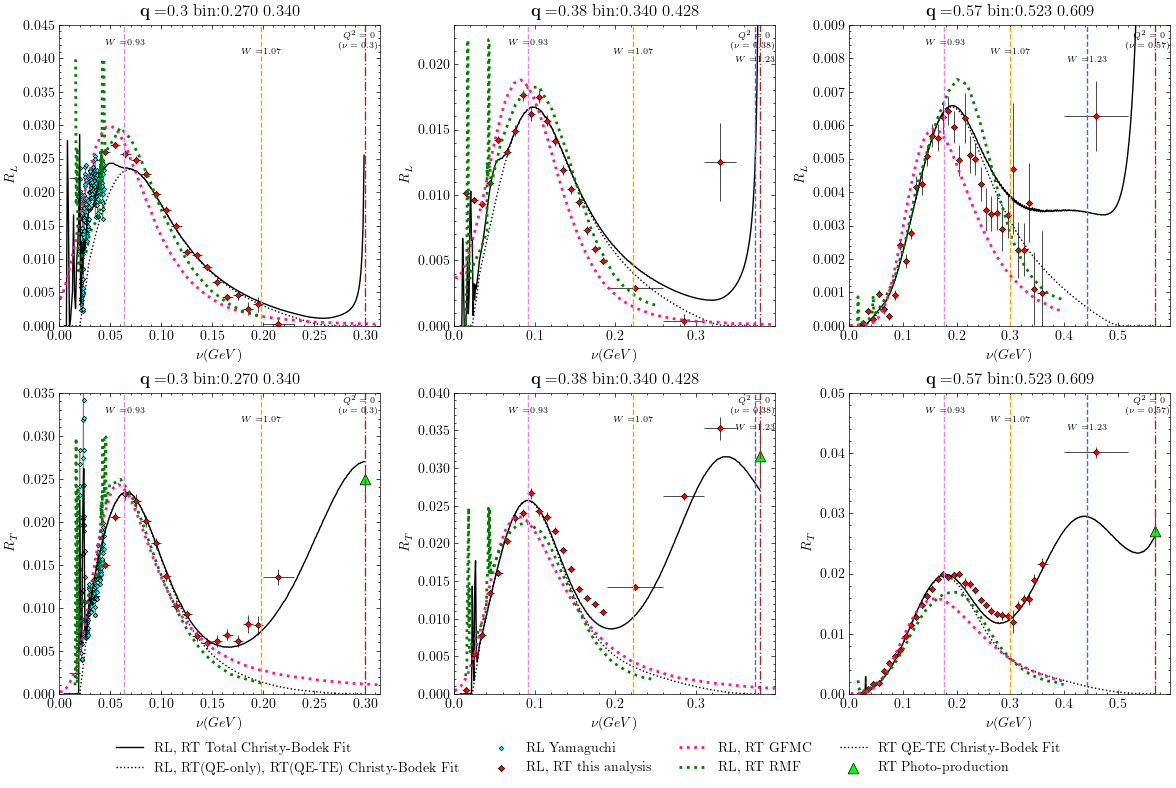

In [17]:
# 6 plots of theory
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
plot_heights = [0.045,0.023,0.009,0.035,0.04,0.05]

with PdfPages('figures/RLRT_TheoryOnly_3bins.pdf') as pdf:

    RL_total_Christy_Bodek = 0
    RL_QE_Christy_Bodek = 0
    RL_this_analysis = 0
    RL_Yamaguchi = 0
    RL_NuWRo = 0
    RL_Sheren = 0
    RL_Goldemberg = 0
    RL_theory = 0
    inspected_qvcenters = [0.3,0.38,0.57]
    ax_to_i = {0:5, 1:6, 2:8}
    for plot_index, ax in enumerate(axs.flat):
        if plot_index in [3,4,5]:
            continue
        i = ax_to_i[plot_index]
        plot_height = plot_heights[plot_index]
        qvcenter = qvcenters[i]
        qvcenter_data = Qvcenter_datas[i]
        qv2center = qvcenter**2
        qvbin_name = qvbin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]

        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]

        Q2_grid = qvcenter**2-nu_grid**2
        Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid
        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            nu = nu_grid[j]
            Q2 = Q2_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            if Ex < 0:
                continue
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                RT = (2*b_opt*Q2/qv2center)/1000
                RTerr = (2*b_err*Q2/qv2center)/1000

                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                RLs.append(RL)
                RLerrs.append(RLerr)
                RTs.append(RT)
                RTerrs.append(RTerr)
                RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            responseq2_plotting = qvcenter_data
            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")
        if RL_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black',label="RL, RT Total Christy-Bodek Fit", linestyle='solid')
            RL_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RL"],color='black', linestyle='solid')
        if RL_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black',label="RL, RT(QE-only), RT(QE-TE) Christy-Bodek Fit", linestyle='dotted') 
            RL_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RLQE"],color='black', linestyle='dotted')   
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
        
        # Yamaguchi
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            nu_ex30 = -2*mass_C12 + 2*np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*0.03)
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            Yam_data = Yam_data.loc[Yam_data['nu_RL']<=nu_ex30]
            if RL_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',label="RL Yamaguchi",**scatter_setting)
                RL_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',**scatter_setting)
            ax.plot(Yam_data['nu_RL'],Yam_data["RL"],lw=0.5,color='gray',zorder=-2)

        
        ax.errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], xerr = fit['xerr'], color='red', **errorbar_setting)

        # this analysis
        if len(Yam_data) > 0:
            fit = fit.loc[fit['nu']>=Yam_data['nu_RL'].max()]
        if RL_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RL'],color='red',label='RL, RT this analysis',**our_scatter_setting)
            RL_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RL'],color='red',**our_scatter_setting)
        ax.set_title("$\mathbf{q}=$"+str(qvcenter)+' bin:'+qvbin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_L$")
        
        # # Jourdan, Barreau
        # if qvcenter in Jourdan_qvs:
        #     Jourdan_data = pd.read_excel('Jourdan_RL_RT_plots.xlsx')
        #     Jourdan_data = Jourdan_data.loc[Jourdan_data['Q']==qvcenter]
        #     ax.errorbar(Jourdan_data['nu'],Jourdan_data["RL"], yerr = Jourdan_data["Error(RL)"], color='darkorange', **errorbar_setting)
        #     if RL_Jourdan == 0:
        #         ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='yellow',label="RL Jourdan", **scatter_setting)
        #         RL_Jourdan = 1
        #     else:
        #         ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='yellow',**scatter_setting)

        #     # plot barreau along with Ryan
        #     Bar_RL = pd.read_csv('Barreau/Barreau_RL_qvcenter_'+str(qvcenter)+'.csv')
        #     Bar_RT = pd.read_csv('Barreau/Barreau_RT_qvcenter_'+str(qvcenter)+'.csv')
        #     ax.errorbar(Bar_RL['nu'],Bar_RL["RLbc"], yerr = Bar_RL["RLerr_bc"], color='blue', **errorbar_setting)
        #     if RL_Barreau == 0:
        #         ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue',label="RL Barreau bin-centered", **scatter_setting)
        #         RL_Barreau = 1
        #     else:
        #         ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue', **scatter_setting)

        # # NuWRo
        # if qvcenter in SF_FSI_qvs:
        #     qvcenter_MeV = int(qvcenter*1000)
        #     df_SF = pd.read_csv('SF_FSI/Resp_FSI_12C_'+str(qvcenter_MeV)+'_SF.txt',delim_whitespace=True,header=None)
        #     df_SF.columns = ['nu','RL','RT']
        #     if RL_NuWRo == 0:
        #         ax.scatter(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',s=5)
        #         RL_NuWRo = 1
        #     else:
        #         ax.scatter(df_SF['nu']/1000,df_SF['RL'],color='green',s=5)

        # if qvcenter in SF_qvs:
        #     df_SF = pd.read_csv(f'SF/Resp_12C_{qvcenter}_SF.txt',delim_whitespace=True,header=None)
        #     df_SF.columns = ['nu','RL','RT']
        #     if RL_NuWRo_SF == 0:
        #         ax.scatter(df_SF['nu'],df_SF['RL'],label='RL QE NuWRo-SF',color='purple',s=5)
        #         RL_NuWRo_SF = 1
        #     else:
        #         ax.scatter(df_SF['nu'],df_SF['RL'],color='purple',s=5)

        # theory GFMC, RMF
        if qvcenter in RLRT_theory_qvs:
            # theory_gfmc = pd.read_csv(f"Eric/response-theory/rl_gfmc_qv{qvcenter}.dat",delimiter='\t')
            # theory_gfmc.columns = ['nu','RL']
            theory_gfmc = pd.read_excel('RL_RT_GFMC_March7.xlsx')
            theory_rmf = pd.read_csv(f"Eric/response-theory/rl_rmf_qv{qvcenter}.dat",delimiter='\t')
            theory_rmf.columns = ['nu','RL']
            if RL_theory == 0: 
                ax.plot(theory_gfmc['RL_nu_'+str(qvcenter)],theory_gfmc['RL_GFMC_'+str(qvcenter)], label = 'RL, RT GFMC',color = 'deeppink', linestyle='dotted',lw=2)
                ax.plot(theory_rmf['nu'],theory_rmf['RL'], label = 'RL, RT RMF',color = 'green', linestyle='dotted',lw=2)
                RL_theory = 1
            else:
                ax.plot(theory_gfmc['RL_nu_'+str(qvcenter)],theory_gfmc['RL_GFMC_'+str(qvcenter)],color = 'deeppink',linestyle='dotted',lw=2)
                ax.plot(theory_rmf['nu'],theory_rmf['RL'],color = 'green', linestyle='dotted',lw=2)


        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        W_colors = ['violet','orange','royalblue']
        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3

        # W peaks
        # 0.8649, 1.1449, 1.5129
        W_locations = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks**2)
        for k in range(len(W_peaks)):
            location = W_locations[k]
            # location = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks[k]**2)
            if location < qvcenter:
                ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
                if k == 0:
                    ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
                elif k == 1:
                    ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
                else:
                    ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]), **text_setting)
            
        ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        ax.text(qvcenter*0.98, plot_height*0.98, '$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)
        totalChi2 = np.sum(fit['Chi2'])


        ax.set_xlim(0.0, qvcenter*1.05)
        # if W_locations[2] > qvcenter:
        #     ax.set_xlim(0.0, W_locations[2]*1.05)
        

        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(axs0_y_low,plot_height)
        ax.set_ylim(axs0_y_low,plot_height)
        # ax.legend()


    RT_total_Christy_Bodek = 1
    RT_QE_Christy_Bodek = 0
    RT_this_analysis = 1
    RT_Yamaguchi = 1
    RT_Sheren = 1
    RT_Goldemberg = 1
    RT_NuWRo = 1
    RT_theory = 1 
    RT_photo = 0
    ax_to_i = {3:5, 4:6, 5:8}
    for plot_index, ax in enumerate(axs.flat):
        if plot_index in [0,1,2]:
            continue
        plot_height = plot_heights[plot_index]
        i = ax_to_i[plot_index]
        qvcenter = qvcenters[i]
        qvcenter_data = Qvcenter_datas[i]
        qv2center = qvcenter**2
        qvbin_name = qvbin_names[i]
        # W2width = W2widths[i]
        # Exwidth = 0.02
        bin_data = df.loc[df['qvcenter']==qvcenter].copy()
        # drop dataset 13, 18, 19, 21
        fit = pd.DataFrame(columns=['nu','RL','RLerr','RT','RTerr','Chi2','num_points','xerr'])
        nuwidth = nuwidths[i]


        
        RLs = []
        RLerrs = []
        RTs = []
        RTerrs = []
        nus = []
        RxQ2s = []
        RxQ2_errs = []
        Exs = []

        # formulate 0 < nu < q3

        # nu_grid = np.arange(0,qvcenter,nuwidth*2)
        nu_grid = nu_grids[i]

        Q2_grid = qvcenter**2-nu_grid**2
        Ex_grid = nu_grid-Q2_grid/(2*mass_C12)
        W2_grid = mass_nucleon**2+2*mass_nucleon*nu_grid-Q2_grid

        
        # for nu in nu_grid:
        for j in range(len(nu_grid)-1):
            nu = nu_grid[j]
            Q2 = Q2_grid[j]
            Ex = Ex_grid[j]
            W2 = W2_grid[j]

            # Ex = nu-(qvcenter**2-nu**2)/(2*mass_C12)
            if Ex < 0:
                continue
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # qv2 = Q2center+nu**2
            # nu = - mass_C12 + np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*Ex)
            # Q2 = qvcenter**2-nu**2
            # W2 = mass_nucleon**2+2*mass_nucleon*nu-Q2

            # picked = bin_data.loc[((nu-nuwidth)<=bin_data["nu"]) & (bin_data["nu"]<=(nu+nuwidth))]

            # picked = bin_data.loc[(bin_data["nu"]>=nu_grid[j]) & (bin_data["nu"]<=nu_grid[j+1])]
            if nu+(nu_grid[j+1]-nu)/2 <= 0.05:
                picked = bin_data.loc[(bin_data['Ex']>=Ex_grid[j]) & (bin_data['Ex']<Ex_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_ex']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_ex']*picked['Hcc_error(GeV)']
            else:
                picked = bin_data.loc[(bin_data['W2']>=W2_grid[j]) & (bin_data['W2']<W2_grid[j+1])].copy()
                picked['Hbc_Sig(GeV)'] = picked['bc_qv_w2']*picked['Hcc_Sig(GeV)']
                picked['Hbc_error(GeV)'] = picked['bc_qv_w2']*picked['Hcc_error(GeV)']            
            x = np.array(picked["epsilon"].values)
            y = np.array(picked["Hbc_Sig(GeV)"].values)
            y_err = np.array(picked["Hbc_error(GeV)"].values)
            # picked = picked.drop_duplicates(keep="last")
            # x = np.array(picked["epsilon"].values)
            # y = np.array((picked["bc_qv_nu"]*picked["Hcc_Sig(GeV)"]).values)
            # y_err = np.array((picked["bc_qv_nu"]*picked["Hbc_error(GeV)"]).values)
            
            if len(y)>2 and (np.max(x)-np.min(x))>=0.25:
                if len(y)==2:
                    x = np.concatenate([x, x])
                    y = np.concatenate([y+0.1*y_err, y-0.1*y_err])
                    y_err = y_err * 1.414
                    y_err = np.concatenate([y_err, y_err])

                params, covariance = curve_fit(linear_model, x, y, sigma=y_err, absolute_sigma=True)
                a_opt, b_opt = params
                a_err, b_err = np.sqrt(np.diag(covariance))
                Chi2 = np.sum(np.square((y-linear_model(x,a_opt,b_opt))/y_err))
                RL = a_opt/1000
                RLerr = a_err/1000 
                RT = (2*b_opt*Q2/qv2center)/1000
                RTerr = (2*b_err*Q2/qv2center)/1000

                # if RL < 0:
                #     RL = 0
                #     weights = 1/(y_err**2)
                #     average = np.sum(y*weights)/np.sum(weights)
                #     RT = (2*average*Q2/qv2center)/1000
                #     # RTerr = (2*np.sqrt(1/np.sum(weights))*Q2/qv2center)/1000

                # if RL>=0 and RT>=0:
                RLs.append(RL)
                RLerrs.append(RLerr)
                RTs.append(RT)
                RTerrs.append(RTerr)
                RxQ2s.append( (2*Q2/qv2center)*RL/RT)
                RxQ2_err = np.abs ((2*Q2/qv2center)) * (RL/RT)* np.sqrt( (RLerr/RL)**2 + (RTerr/RT)**2 )
                RxQ2_errs.append(RxQ2_err)
                # W2s.append(W2)
                nus.append(nu+(nu_grid[j+1]-nu)/2)
                # nus.append(nu+nuwidth)

                new_row = pd.Series({'nu':nu + (nu_grid[j+1]-nu)/2,'RL':RL,'RLerr':RLerr,'RT':RT,'RTerr':RTerr,'Chi2':Chi2,
                                    'num_points':len(y),'xerr':(nu_grid[j+1]-nu)/2})             
                fit = append_row(fit,new_row)
                #____________________________________________________________________________________________________________________
                
                # fig = plt.figure(figsize=(12,6))
                # plt.plot(x,linear_model(x,a_opt,b_opt),color='gray',label = 'y='+str(round(a_opt,3))
                #         +'*x+'+str(round(b_opt,3))+'\nRL,RT:'+str(round(RL,3))+','+str(round(RT,3)))
                # datasets = picked['dataSet'].unique()
                            
                # plt.title('$Q^{3}_{center}$:'+str(qvcenter)+'   Ex:'+str(round(Ex,3))+'   nu:'+str(round(nu,3))+'    RL,RT error: '+round_sig_3(RLerr)+','+round_sig_3(RTerr)
                #           +'   $\chi^2$:'+str(round(Chi2,1))+'   DoF:'+str(len(y)-2) +'   $\\frac{\chi^2}{DoF}$:'+str(round(Chi2/(len(y)-2),1)))

                # for dataset in datasets:
                #     picked_dataset = picked.loc[picked['dataSet']==dataset]
                #     plt.errorbar(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],yerr=picked_dataset['Hbc_error(GeV)'],
                #                  fmt ='.',capsize=3,markersize='3')
                #     plt.scatter(picked_dataset['epsilon'],picked_dataset['Hbc_Sig(GeV)'],s=10, label = str(dataset)+' '+dataSet_to_name[dataset])

                # # plt.scatter(x,y,s=1)
                # plt.xlabel('epsilon')
                # plt.ylabel('Hbc')
                # plt.legend()
                # pdf.savefig(fig)
                #____________________________________________________________________________________________________________________

        # fit = pd.DataFrame({'nu':nus,'RL':RLs,'RLerr':RLerrs,'RT':RTs,'RTerr':RTerrs})
        fit['Chi2_DoF']=fit['Chi2']/(fit['num_points']-2)

        try:
            # responseq2_plotting = qvcenter_data.loc[(qvcenter_data['nu']<=qvcenter)]
            responseq2_plotting = qvcenter_data

            # responseq2_plotting = qvcenter_data.loc[qvcenter_data['nu']<=photon_data['nu']]
            # responseq2_plotting = picked.loc[picked['nu']<=np.max(nus)]
        except ValueError:
            print("ValueError: no data points")

        if RT_total_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black',label="RT Total Christy-Bodek Fit", linestyle='solid')
            RT_total_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RT"],color='black', linestyle='solid')
        
        if RT_QE_Christy_Bodek == 0:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"]+responseq2_plotting["RTE"],color='black',label="RT QE-TE Christy-Bodek Fit", linestyle='dotted') 
            RT_QE_Christy_Bodek = 1
        else:
            ax.plot(responseq2_plotting['nu'],responseq2_plotting["RTQE"]+responseq2_plotting["RTE"],color='black', linestyle='dotted')
        # axs[0].scatter(responseq2_plotting['nu'],responseq2_plotting["RL_fortran_qvcenter_nu"],label="Fortran RL", s=3,color='black')    
        
        # axs[0].errorbar(fit['nu'], fit['RL'], yerr = fit['RLerr'], color='red', fmt ='.',capsize=3,markersize='3')
        # axs[0].scatter(fit['nu'], fit['RL'],marker='D',s=6,color='red',label='RL this analysis')
        # new plt style setting
        
        # photon_index = (Photon_plotting['nu'] - qvcenter).abs().idxmin()
        # photon_data = Photon_plotting.loc[photon_index]

        photon_data, photon_data_err = photon_locator(Photon_plotting,qvcenter)
        if RT_photo == 0:
            # ax.scatter(np.array(qvcenter),np.array(photon_data),marker='^',s=40,color='lime',label="RT Photo-production")
            ax.scatter(np.array(qvcenter),np.array(photon_data),label="RT Photo-production",**photo_scatter_setting)
            RT_photo = 1
        else:
            ax.scatter(np.array(qvcenter),np.array(photon_data),**photo_scatter_setting)
        ax.errorbar(np.array(qvcenter),np.array(photon_data),yerr = np.array(photon_data_err),**errorbar_setting)


        # if RT_photo == 0:
        #     ax.scatter(photon_data['nu'],photon_data["RT"],marker='^',s=40,color='lime',label="RT Photo-production")
        #     RT_photo = 1
        # else:
        #     ax.scatter(photon_data['nu'],photon_data["RT"],marker='^',s=40,color='lime')

        # Yamaguchi
        Yam_data = []
        if qvcenter in Yamaguchi_qvs:
            nu_ex30 = -2*mass_C12 + 2*np.sqrt(mass_C12**2 + qvcenter**2 + 2*mass_C12*0.03)
            Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
            Yam_data = Yam_data.loc[Yam_data['nu_RT']<=nu_ex30]
            if RT_Yamaguchi == 0:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',label="RT Yamaguchi",**scatter_setting)
                RT_Yamaguchi = 1
            else:
                ax.scatter(Yam_data['nu_RT'],Yam_data["RT"],color='cyan',**scatter_setting)
            ax.plot(Yam_data['nu_RT'],Yam_data["RT"],lw=0.5,color='gray',zorder=-2)

        
        ax.errorbar(fit['nu'], fit['RT'], yerr = fit['RTerr'],xerr = fit['xerr'], color='red', **errorbar_setting)

        if len(Yam_data) > 0:
            # fit = fit.loc[fit['nu']>=Yam_data['nu_RL'].max()*0.9]
            fit = fit.loc[fit['nu']>=Yam_data['nu_RT'].max()]
        if RT_this_analysis == 0:
            ax.scatter(fit['nu'], fit['RT'],color='red',label='RT this analysis',**our_scatter_setting)
            RT_this_analysis = 1
        else:
            ax.scatter(fit['nu'], fit['RT'],color='red',**our_scatter_setting)
        ax.set_title("$\mathbf{q}=$"+str(qvcenter)+' bin:'+qvbin_name)
        ax.set_xlabel("$\\nu(GeV)$")
        ax.set_ylabel("$R_T$")
        
        # if qvcenter in Jourdan_qvs:
        #     Jourdan_data = pd.read_excel('Jourdan_RL_RT_plots.xlsx')
        #     Jourdan_data = Jourdan_data.loc[Jourdan_data['Q']==qvcenter]
        #     # ax.errorbar(Jourdan_data['nu'],Jourdan_data["RL"], yerr = Jourdan_data["Error(RL)"], color='darkorange', **errorbar_setting)
        #     # if RL_Jourdan == 0:
        #     #     ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='darkorange',label="RL Jourdan", **scatter_setting)
        #     #     RL_Jourdan = 1
        #     # else:
        #     #     ax.scatter(Jourdan_data['nu'],Jourdan_data["RL"],color='darkorange',**scatter_setting)

        #     ax.errorbar(Jourdan_data['nu'],Jourdan_data["RT"], yerr = Jourdan_data["Error(RT)"], color='darkorange', **errorbar_setting)
        #     if RT_Jourdan == 0:
        #         ax.scatter(Jourdan_data['nu'],Jourdan_data["RT"],color='yellow',label="RT Jourdan", **scatter_setting)
        #         RT_Jourdan = 1
        #     else:
        #         ax.scatter(Jourdan_data['nu'],Jourdan_data["RT"],color='yellow', **scatter_setting)

        #     # plot barreau along with Ryan
        #     Bar_RL = pd.read_csv('Barreau/Barreau_RL_qvcenter_'+str(qvcenter)+'.csv')
        #     Bar_RT = pd.read_csv('Barreau/Barreau_RT_qvcenter_'+str(qvcenter)+'.csv')
        #     # ax.errorbar(Bar_RL['nu'],Bar_RL["RLbc"], yerr = Bar_RL["RLerr_bc"], color='blue', **errorbar_setting)
        #     # if RL_Barreau == 0:
        #     #     ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue',label="RL Barreau bin-centered", **scatter_setting)
        #     #     RL_Barreau = 1
        #     # else:
        #     #     ax.scatter(Bar_RL['nu'],Bar_RL["RLbc"],color='blue', **scatter_setting)
            
        #     ax.errorbar(Bar_RT['nu'],Bar_RT["RTbc"], yerr = Bar_RT["RTerr_bc"], color='blue', **errorbar_setting)
        #     if RT_Barreau == 0:
        #         ax.scatter(Bar_RT['nu'],Bar_RT["RTbc"],color='blue',label="RT Barreau bin-centered", **scatter_setting)
        #         RT_Barreau = 1
        #     else:
        #         ax.scatter(Bar_RT['nu'],Bar_RT["RTbc"],color='blue', **scatter_setting)

        # Yam_RLmax = 0
        # Yam_RTmax = 0
        # if qvcenter in Yamaguchi_qvs:
        #     Yam_data = pd.read_excel('Yamaguchi_plotting.xlsx',sheet_name='qv_'+str(qvcenter))
        #     if RL_Yamaguchi == 0:
        #         ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',label="RL Yamaguchi",**scatter_setting)
        #         RL_Yamaguchi = 1
        #     else:
        #         ax.scatter(Yam_data['nu_RL'],Yam_data["RL"],color='cyan',**scatter_setting)
        #     ax.plot(Yam_data['nu_RL'],Yam_data["RL"],lw=0.5,color='gray',zorder=-2)
        #     Yam_RLmax = Yam_data["RL"].max()
        #     Yam_RTmax = Yam_data["RT"].max()
        
        # # goldemberg
        # if qvcenter == 0.1: 
        #     Goldem_data = pd.read_csv('Goldemberger_180.csv')
        #     ax.errorbar(Goldem_data['nu'],Goldem_data["RT"], yerr = Goldem_data["error"], color='skyblue', **errorbar_setting)
        #     ax.scatter(Goldem_data['nu'],Goldem_data["RT"],color='blue',label="RT Goldemberg",**scatter_setting)
            
        # # NuWRo
        # if qvcenter in SF_FSI_qvs:
        #     qvcenter_MeV = int(qvcenter*1000)
        #     df_SF = pd.read_csv('SF_FSI/Resp_FSI_12C_'+str(qvcenter_MeV)+'_SF.txt',delim_whitespace=True,header=None)
        #     df_SF.columns = ['nu','RL','RT']
        #     # if RL_NuWRo == 0:
        #     #     ax.scatter(df_SF['nu']/1000,df_SF['RL'],label='RL QE NuWRo-SF-FSI',color='green',s=5)
        #     #     RL_NuWRo = 1
        #     # else:
        #     #     ax.scatter(df_SF['nu']/1000,df_SF['RL'],color='green',s=5)
        #     if RT_NuWRo == 0:
        #         ax.scatter(df_SF['nu']/1000,df_SF['RT'],label='RT QE NuWRo-SF-FSI',color='green',s=5)
        #         RT_NuWRo = 1
        #     else:
        #         ax.scatter(df_SF['nu']/1000,df_SF['RT'],color='green',s=5)

        # if qvcenter in SF_qvs:
        #     df_SF = pd.read_csv(f'SF/Resp_12C_{qvcenter}_SF.txt',delim_whitespace=True,header=None)
        #     df_SF.columns = ['nu','RL','RT']
        #     if RL_NuWRo_SF == 0:
        #         ax.scatter(df_SF['nu'],df_SF['RT'],label='RT QE NuWRo-SF',color='purple',s=5)
        #         RL_NuWRo_SF = 1
        #     else:
        #         ax.scatter(df_SF['nu'],df_SF['RT'],color='purple',s=5)


        # theory GFMC, RMF
        if qvcenter in RLRT_theory_qvs:
            # theory_gfmc = pd.read_csv(f"Eric/response-theory/rl_gfmc_qv{qvcenter}.dat",delimiter='\t')
            # theory_gfmc.columns = ['nu','RL']
            theory_gfmc = pd.read_excel('RL_RT_GFMC_March7.xlsx')
            theory_rmf = pd.read_csv(f"Eric/response-theory/rt_rmf_qv{qvcenter}.dat",delimiter='\t')
            theory_rmf.columns = ['nu','RT']
            if RT_theory == 0: 
                ax.plot(theory_gfmc['RT_nu_'+str(qvcenter)],theory_gfmc['RT_GFMC_'+str(qvcenter)], label = 'RT GFMC',color = 'deeppink', linestyle='dotted',lw=2)
                ax.plot(theory_rmf['nu'],theory_rmf['RT'], label = 'RT RMF',color = 'green', linestyle='dotted',lw=2)
                RT_theory = 1
            else:
                ax.plot(theory_gfmc['RT_nu_'+str(qvcenter)],theory_gfmc['RT_GFMC_'+str(qvcenter)],color = 'deeppink', linestyle='dotted',lw=2)
                ax.plot(theory_rmf['nu'],theory_rmf['RT'],color = 'green', linestyle='dotted',lw=2)


            
        # W2_peaks = np.array([0.93,1.07,1.23])
        W_peaks = np.array([0.93,1.07,1.23]) 
        W_colors = ['violet','orange','royalblue']
        W_height0 = fit['RL'].max()*1.3
        W_height1 = fit['RT'].max()*1.3
        W_locations = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks**2)

        for k in range(len(W_peaks)):
            # location = 0.025-mass_nucleon+np.sqrt(qvcenter**2+W_peaks[k]**2)
            location = W_locations[k]
            if location < qvcenter:
                ax.axvline(x=location, color = W_colors[k], linestyle='dashed')
                if k == 0:
                    ax.text(location, plot_height*0.98, '\n$W=$'+str(W_peaks[k]),**text_setting)
                elif k == 1:
                    ax.text(location, plot_height*0.98, '\n\n$W=$'+str(W_peaks[k]),**text_setting)
                else:
                    ax.text(location, plot_height*0.98, '\n\n\n$W=$'+str(W_peaks[k]),**text_setting)

        ax.axvline(x=qvcenter, color = 'brown', linestyle='dashdot')
        ax.text(qvcenter*0.98, plot_height*0.99, '$Q^2=0$\n'+f'$(\\nu={qvcenter})$' ,**text_setting)
        totalChi2 = np.sum(fit['Chi2'])

        ax.set_xlim(0.0, qvcenter*1.05)
        # if qvcenter < W_locations[2]:
        #     ax.set_xlim(0.0, W_locations[2]*1.05)

        axs0_y_low = 0
        axs1_y_low = 0
        if fit['RL'].min()<0:
            axs0_y_low = fit['RL'].min()*1.1
        if fit['RT'].min()<0:
            axs1_y_low = fit['RT'].min()*1.1
        # if len(fit['nu']) > 0:
        #     ax.set_ylim(0, plot_height)
        ax.set_ylim(axs1_y_low, plot_height)




    plt.tight_layout()  # Optional, for better spacing between subplots
    plt.subplots_adjust(bottom=0.12)
    fig.legend(loc='lower center', ncol=4)
    pdf.savefig(fig)



In [ ]:
'''
-1.  I meant we  show the fortran fit even if there is no data past the W.123,   Similar to what we do for q3 where  
    show Fortran fit up to photproduction limit. The fortran fit can be used to validate neutrino MC so we show it in the resonance region 
    even if we have no data.
    It shows that there is no Delta peak in RL and There is a Delta peak at W=1.23 in RT  showing that the Delta resonance is
    Primarily transverse.

2.  I uploaded Elong 32 which gives the  RL and RT for GRMC. Use the highlighted columns in yellow;

-3.  I think that the photoproduction data should be larger triangles and have a black edge and color inside.

4.  I think the most efficient thing would be to have your plots as follows -  FOR THE FIRST 12 PLOTS for both q3 and Q2

     -A.  RL and RT for all q3 and Q2. show data, Fortran Fit as before,  and NuWRo. SF+SFI and SF only,   No Jordan or Barreau data.
            This is what you show to demonstrate validation of neutrino MC.

     B.   RL and RT vs q3 (3 plots:)   Comparisons to theory for three  q3 values
     C.  RL and RT vs q3 (3 plots) and for Q2=0.16 (one plot)  ,  comparison to previous analysis.

5.  We will not see much in the highest 6 q3 and Q2 plots, but lets work on those later
     ( we will need to have additional plots that just show data below W=1.3 so we can 
        Make a different scale).
     

'''

In [ ]:
''' 
-1. larger spamer error bar
-2. nu = qvcenter (Q2 = 0) move up
-3. don't show our data below 0.25 if Yamaguchi is there
-4. double nu bin widths at large qv
    qv=0.3: last two points need to be combined
    qv=0.38: last 6 points need to be combined
    qv=0.475: last 4 points need to be combined
    qv=0.57: last 11 points need to be combined
    qv=0.756: last 12 points need to be combined 4 times wider?
-5. split 1.302 bin to up and above
-6. photo production interpolation
-7. pack 8 RL plots together, 8 RT plots together. Legends on top, seperately
8: in talk, show stop at 0.991 (12 plots)
-9. larger: split into lower nu, higher nu
    new bin: qvcenter = 3.500, (2.923~4.500)
10. plots of ours and fit, nuwro; plots with otehr's data to comopare
-11. our compare to theory points
12. 0.148, 0.3, 0.475, 0.649 plot with 3 nuwro plots
13. 15 min talk and backup
    in the talk, first 9 bins
        second 9 bins for backup

Meeting March 1
14. more burreau on Elog to plot
'''

In [ ]:
# Feb 23 meeting
'''
-1. put W2 binding energy (in nu, its 0.025. convert to W2, put it on W peaks)
-2. W peaks mark on top of the line, not legend
-3. nu=qv legend: put (Q2=0)
-4. Yamaguchi: connect dots with lines
-5. Remove Ryan from plot
-6. include Goldemberg in analysis
7. Talk: why doing it: testing theory
    1. define the regions (Q2=0.093) (use us and Yamaguchi)
    2. compare to other data (use qv=0.3, 0.38, 0.57; Q2=0.16)
        not comparing to NuWRo
    3. Then show our data (W2<2.0) both Q2 and qv
        comparing to NuWRo
        Show our fit, our QE
    4. our data only, fit, QE, 
        When Sheren involved, just use Sheren's data
    5. compare to theory
        GFMC, ED-RMF: available theory data: qv=0.3, 0.38, 0.57
        take total data, subtract inelastic (delta-resonance, the peak on the right), to get QE only, so can compare with NuWRo
-8. Make our data more visible (big points, sharp)
-9. put on Sheren bin
10. nuclear excitation, quasi-elastic, pion production, delta resonance
    For bins with Yamaguchi data:
    below Ex=30: Yamaguchi's avaible 40, we starts at 30 (all converted to nu)

    for qv>30: no more yamaguchi, we use our data and our fit    
    Ex 
-11: 
    nu<50: Ex bc analysis (then convert to nu)
    nu>50: W2 bc analysis (then convert to nu)


    
Email Feb 21:
-1.     I removed Q2=0.65 and Q2=1.05 bins and the corresponding q3=0.878 and 1.168 bins.   Now we should be very close to
         what Sheren used.  The boundaries of Q2=0.5. and Q2=0.8,  and Q2=1.25 have changed to to absorb the bins that were removed. See attached

-2.    Similarly the boundaries of  q3 = 0.756, 0.991 and 1.302 have also changed to absorb the bins that were removed.

-3..   Can you apply a bin centering correction to q3=0.4 Barreau data to move it to q3=0.38. (on the plots show q=0.4->0.38)
-4.     And Can you apply a bin centering correction to q3=0.55 Barreau data to move it to q3=0.57. (on the plots show q=0.55->0.57)

-5.  On the Q2= 0.01, 0.020. 0.026  0.040. 0.045. 0.093. show the data from Goldberg and Yamaguchi for q=0.1, 0.148, 0.167, 0.205, 0.249, 0.307
-6.  On the Q2=0.01 plot we should also show the Q2=0 plot for RT photo production.

-5.  Both q3 and Q2 plots should be done vs. Ex bin centering and W^2 bin centering.  
      Later we will convert Ex and W^2  to \nu.   Then we will use the Ex data for Ex<0.05 GeV,   and use the W^2 data from Ex>0.05 GeV

-6.  On the plots  Change “our fit”  “this analysis”

-7.  Can you make the NuWRo Green dotted curve (Big dots) so that we can tell the difference between it and our QE plot

-8.  The photoproduction data should be large RED symbol  (so it is different from everything else.)

-9.  On the nuclear excitation region connect the blue points with a red line to show the peaks.

-8.  On q=0.24, q= 0.38 l q=0.649, q=0.992,   q=1.302.  1.691. 1.921l, 2.213,  2.783 plots the photoproduction data is not on the line

9.  We need to finalize normalizations for  18. 29,  21

-10.   For the Ex and W^2 plots for q3. And for Q2,  can you run it so that we can see all the linear fits for RL and RT so
        we can  look at normalizations and figure out which data are causing problems.

'''

In [ ]:
# Feb 26 notes
'''
-1. Regarding the one parameter fit. Please put the error from the two parameter fit also on RT.  
     Plot publication quality
     Current plots will be rejected by puclicaion

-2. Our red points should be larger so they are clearly seen
-3. All lines should be darker

-4. All axis and legend should be much larger

-5. Photo points much larger. 

-6  need to get photo points on the correct nu=q line interpolate photon data to 
  Get it right
-7. Spammer error double it 
-8. QE plot on RT   Change to QE+TE
-9. Q^3 to bold q

'''